<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER2%20%EC%A7%80%EB%8F%84%20%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 들어가며

지도 학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용함. 즉 훈련 세트로부터 머신러닝 모델을 만듦. 우리의 목표는 이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측하는 것임. 지도 학습은 종종 데이터를 만드는 데 사람의 노력이 필요하지만 일단 자동화를 도모하면 힘들고 어려운 작업의 처리 속도를 제고할 수 있음.

# 2.1 분류와 회귀

지도 학습에는 '분류(classification)'와 '회귀(regression)'가 있음.

분류는 미리 정의된, 가능성 있는 여러 '클래스 레이블(class label)' 중에 하나를 예측하는 것임. 딱 두 개의 클래스로 분류하는 '이진 분류(binary classification)'와 셋 이상의 클래스로 분류하는 '다중 분류(multiclass classification)'로 나뉨. 1장에서 붓꽃을 세 품종 중 하나로 분류하는 문제는 붓꽃 품종이 3개이므로 다중 분류 문제임. 

이진 분류는 질문의 답이 예와 아니오만 나올 수 있게 하는 것임. 이메일에서 스팸을 분류하는 것이 대표적인 예이며 예/아니오 대답에 대한 질문은 "이 이메일은 스팸인가요?" 가 됨. 한 클래스를 양성(positive) 클래스, 다른 하나를 음성(negative) 클래스라고 하는데, 양성 클래스는 학습하고자 하는 대상을 의미하므로 스팸 메일이 양성 클래스가 되는 것임. 다만 두 클래스 중에 어떤 것을 양성으로 정할지는 주관적인 문제이므로 분야에 따라 다름. 다른 예로는 웹사이트의 글을 사용하여 어떤 언어의 웹사이트인지 예측하는 문제가 있는데, 이 문제에서 클래스는 미리 만들어놓은 언어 목록임.

회귀는 연속적인 숫자, 또는 프로그래밍 용어로 말하면 '부동소수점수(수학 용어로는 실수)'를 예측하는 것임. 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것이 회귀 문제의 한 예임. 소득을 예측할 때 예측된 값은 어떤 양으로서, 일정 범위 안의 어떤 숫자도 될 수 있음. 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등로 올해 수확량을 예측하는 예도 회귀 문제이며 수확양 또한 어떤 숫자든 가능함.

출력 값에 연속성이 있는지 질문하면 회귀와 분류 문제를 쉽게 구분할 수 있음. 예상 출력 값 사이에 연속성이 있다면 회귀 문제임. 연소득을 예측하는 경우 출력에 확연한 연속성이 존재하는데, 어떤 사람이 1년에 40,000,000원 또는 40,000,001원을 벌 수 있다면  그 양은 분명 다르지만 큰 차이는 아님. 즉 우리 알고리즘이 40,000,000원을 예측해야 하는데 39,999,999원이나 40,000,001원을 예측했다고 해도 큰 문제가 되지 않음.

반대로 분류 문제로서 웹사이트가 어떤 언어로 구성되어 있는지 인식하는 작업에는 정도란 것이 존재할 수가 없음. 한 언어가 아니면 다른 언어임. 언어 사이에는 연속성이 없고 영어와 프랑스어 사이에 다른 언어는 없음. 물론 언어를 독립적이고 고정된 것으로 표현하는 것은 무리가 있음. 

# 2.2 일반화, 과대적합, 과소적합

지도 학습에서는 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면 처음 보는 새로운 데이터가 주어져도 정확히 예측할 것으로 기대함. 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 '일반화(generalization)'되었다고 함. 그래서 모델을 만들 때는 가능한 한 정확하게 일반화되도록 해야 함.

보통 훈련 세트에 대해 정확하게 예측하도록 모델을 구축함. 훈련 세트와 테스트 세트가 매우 비슷하면 그 모델이 테스트 세트에서도 정확하게 예측할 것으로 기대할 수 있음. 하지만 항상 그런 것도 아닌데, 예를 들어 아주 복잡한 모델을 만들면 훈련 세트에만 정확한 모델이 될 가능성도 있음.

가상의 예를 만들어 봄. 요트를 구매한 고객과 구매 의사가 없는 고객의 데이터를 활용하여 누가 요트를 살지 예측하려고 함. 무관심한 고객들이 아닌 실제로 구매할 것 같은 고객들에게만 홍보 메일을 보내는 것이 목표임. 다만 이게 좀 까다로운 문제인 이유는 아직 요트를 사지 않았다고 알고 있던 고객이 사실 다른 곳에서 요트를 샀을지도 모르고, 나중에 요트를 사려고 저축하거나 계획해뒀을 수도 있다는 것임.

아래는 고객 샘플 데이터임. 출처는 파이썬 라이브러리를 활용한 머신러닝(번역개정판).
 <img src='https://drive.google.com/uc?export=view&id=1TMAwRvCh9gsF2kiUOpl35nyhA5nA0o5X' width = 50% >

이 데이터를 활용하여 새로운 고객이 요트를 구매할 것인가에 대한 질문에 만족할 만한 답을 줄 수 있는 모델을 만들어야 함. 새로운 고객에도 잘 작동하는 규칙을 찾아야 하므로 훈련 세트에서 100% 정확도를 달성하는 것은 크게 도움이 되지 않음. 테스트 세트를 따로 활용하여 훈련 세트와 테스트 세트의 정확도를 가장 근접한 지점까지 맞춰야 함. 우리가 예측하려는 대상은 이 데이터셋이 아니라 새로운 고객이기 때문임. 알고리즘이 새로운 데이터도 잘 처리하는지 측정하는 방법은 테스트 세트로 모델을 평가하는 수밖에 없음.

직관적으로 이 데이터를 보면 간단한 모델이 새로운 데이터에 더 잘 일반화될 것이라고 예상할 수 있음. 예를 들면 "50세 이상인 사람은 보트를 사려고 한다." 라는 규칙을 만들었다면 이 규칙은 모든 고객 데이터를 만족시킬 뿐만 아니라, 나이 외에 자녀 수나 혼인 상태를 추가한 규칙보다 더 신뢰할 수 있음. 그러므로 항상 간단한 모델만 찾으려는 늪에 스스로 빠지는 것임.

주목해야 할 점은 '과대적합(overfitting)'과 '과소적합(underfitting)'이 일어나지 않도록 일반화 성능이 최대가 되는 최적점에 있는 모델을 만들어야 한다는 것임.

'과대적합'은 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 의미하며 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어나는 현상임. 즉 훈련 세트 점수가 지나치게 높고 테스트 세트 점수가 지나치게 낮은 것을 의미함. 

'과소적합'은 너무 간단한 모델을 만드는 것을 의미하며 "주택을 보유한 사람은 모두 요트를 사려고 한다." 와 같은 규칙만을 적용하면 데이터의 면면과 다양성을 잡아내지 못하고 훈련 세트에도 잘 맞지 않을 것임. 즉 훈련 세트 점수가 낮고 테스트 세트 점수가 높거나, 훈련 세트 점수와 테스트 세트 점수 모두 낮은 것을 의미함.

정리하자면 모델을 복잡하게 할수록 훈련 데이터에 대해서는 더 정확하게 예측할 수 있으나 너무 복잡해지면 훈련 세트의 각 데이터 포인트에 너무 민감해져서 새로운 데이터에 잘 일반화되지 않음. 우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델임.

과대적합과 과소적합의 절충점을 아래 그림에서 나타냄. 출처는 파이썬 라이브러리를 활용한 머신러닝(번역개정판).
 <img src='https://drive.google.com/uc?export=view&id=1G_gq95m6NAtmuVcs90CKCBBwozynDMys' width = 50% >



## 2.2.1 모델 복잡도와 데이터셋 크기의 관계

모델 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊음. 데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있음. 보통 데이터 포인트를 더 많이 모으는 것이 다양성을 키워주므로 큰 데이터셋은 더 복잡한 모델을 만들 수 있게 함. 그러나 같은 데이터 포인트를 중복하거나 매우 비슷한 데이터를 모으는 것은 도움이 되지 않음.

위 요트 판매 예로 돌아가면, 고객 데이터를 10,000개 모았더니 전부 "45세 이상이고 자녀가 셋 미만이며 이혼하지 않는 고객은 요트를 사려고 한다." 라는 규칙을 만족한다면 위 [표 2-1]의 12개만 사용할 때보다 훨씬 좋은 규칙이라고 할 수 있음.

데이터를 더 많이 수집하고 적절하게 더 복잡한 모델을 만들면 지도 학습 문제에서 종종 놀라운 결과를 얻을 수 있음. 이 책에서는 고정 크기의 데이터셋을 사용하는 데 집중함. 모델을 변경하거나 조정하는 것보다 이득일 수 있으므로 실제 환경에서는 데이터를 얼마나 많이 모을지 정해야 함. 

# 2.3 지도 학습 알고리즘

각 알고리즘을 자세히 설명하는 내용을 모두 읽을 필요는 없지만 모델을 이해하면 여러 머신러닝 알고리즘의 작동 방식을 더 잘 알 수 있음. 

## 2.3.1 예제에 사용할 데이터셋

여러 알고리즘을 설명하기 위해 데이터셋도 여러 개를 사용함. 어떤 데이터셋은 작고 인위적으로 만든 것이며, 알고리즘의 특징을 부각하기 위해 만든 것도 있음. 실제 샘플로 만든 큰 데이터셋도 있음.

두 개의 특성을 가진 forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋임. 다음 코드는 이 데이터셋의 모든 데이터 포인트를 산점도로 그림. x축은 첫 번째 특성, y축은 두 번째 특성임. 모든 산점도가 그렇듯이 점 하나가 각 데이터 포인트를 나타냄. 점의 색과 모양은 데이터 포인트가 속한 클래스를 나타냄.

In [142]:
pip install mglearn

In [143]:
# 라이브러리를 임포트 함.
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
X.shape: (26, 2)


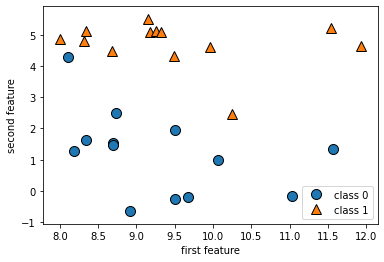

In [144]:
# 데이터셋을 만듦.
X, y = mglearn.datasets.make_forge()
print(X, y)

# 산점도를 그림. `X[:, 0]`은 X의 전체(:) 중에 0인 것만 골라낸다는 의미임. 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['class 0', 'class 1'], loc=4)
plt.xlabel('first feature')
plt.ylabel('second feature')

print('X.shape:', X.shape)
# 데이터 포인트 26개, 특성 2개를 가짐.

회귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용함. wave 데이터셋은 입력 특성 하나와 모델링 할 타깃 변수(또는 응답)를 가짐. 종이는 2차원이므로 특성 2개가 넘으면 표현하기 어려우니 손쉽게 시각화하기 위해 간단한 저차원 데이터셋을 사용함. 특성이 적은 데이터셋(저차원 데이터셋)에서 얻은 직관이 특성이 많은 데이터셋(고차원 데이터셋)에서 유지되지 않을 수 있지만 알고리즘을 익힐 때는 저차원 데이터셋을 사용하는 것이 매우 좋음.

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]] [-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.4741103

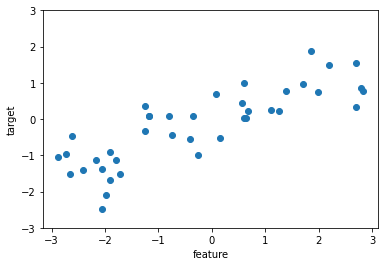

In [145]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print(X, y)

plt.plot(X, y, 'o')
# ylim(시작 숫자, 끝 숫자) 함수는 시작 숫자와 끝 숫자만큼 축의 한계를 설정함.
plt.ylim(-3, 3)
plt.xlabel('feature')
plt.ylabel('target')

print('X.shape:', X.shape)

인위적인 소규모 데이터셋 외에 사이킷런에 들어 있는 실제 데이터셋 두 개도 사용함. 하나는 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암(Wisconsin Breast Cancer) 데이터셋이며 줄여서 cancer라고 함. 각 종양은 양성(benign)과 악성(malignant)으로 레이블 되어 있고, 조직 데이터를 기반으로 종양이 악성인지 여부를 예측할 수 있도록 학습하는 것이 과제임. 이 데이터는 사이킷런에 있는 `load_breast_cancer` 함수를 사용하여 가져올 수 있음.

사이킷런에 포함된 데이터셋은 실제 데이터와 데이터셋 관련 정보를 담고 있는 Bunch 객체에 저장되어 있음. Bunch 객체는 파이썬 딕셔너리(dictionary)와 비슷하지만 점 표기법을 사용할 수 있음. 즉 `bunch['key']` 대신 `bunch.key`를 사용할 수 있음.

In [146]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [147]:
print('cancer.keys():', cancer.keys())
print('유방암 데이터의 형태:', cancer.data.shape)
print('특성 이름:\n', cancer.feature_names)

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태: (569, 30)
특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [148]:
print(cancer.target_names)
print(cancer.target)
print(np.bincount(cancer.target))
# malignant가 0, benign이 1임.

print('클래스별 샘플 개수:', {n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
# `target_names` 에는 malignant와 benign이 들어있는데, 여기에서 하나씩 꺼내서 'n'에 넣고,
# 'target'에는 0과 1이 들어있는데, 각 숫자 개수를 세서 'v'에 넣으면 딕셔너리가 만들어짐.
# `np.bincount` 함수에 대한 'https://runebook.dev/ko/docs/numpy/reference/generated/numpy.bincount' 를 참고 바람.
# 위 링크로 접속하려면 ctrl키를 누르고 링크를 클릭하면 됨.

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [149]:
print('자세한 정보:\n', cancer.DESCR)

자세한 정보:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean 

아울러 회귀 분석용 실제 데이터셋으로 보스턴 주택가격(Boston Housing) 데이터셋을 사용함. 이 데이터셋으로 할 작업은 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용하여 1970년대 보스턴 주변의 주택 평균 가격을 예측하는 것임. 이 데이터셋에는 데이터 포인트 506개, 특성 13개가 있음.

In [150]:
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터의 형태:', boston.data.shape)

데이터의 형태: (506, 13)


In [151]:
print('자세한 정보:\n', boston.DESCR)

자세한 정보:
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PT

이 데이터셋에서는 입력 특성 13개뿐만 아니라 특성끼리 곱하여(또는 상호작용이라 일컬음) 의도적으로 확장함. 다시 말하면 범죄율과 고속도로 접근성의 개별 특성은 물론 범죄율과 고속도로 접근성의 곱도 특성으로 여긴다는 뜻임. 이렇게 특성을 유도하는 것을 '특성 공학(feature engineering)'이라고 함. 4장에서 자세하게 다룸. 유도된 데이터셋은 `load_extended_boston` 함수를 사용하여 부를 수 있음.

In [152]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape:', X.shape)
# 특성 13개에서 중복을 포함하여 2개씩 짝지은 특성 91개를 더해서 104개가 됨.
# 첫 번째 특성으로 교차항 13개가 만들어지고,
# 두 번째 특성으로 교차항 12개가 만들어짐.
# 세 번째 특성으로 교차항 11개가 만들어짐.
# 13 + 12 + 11 + ... + 1 = 91개

X.shape: (506, 104)


위 특성 공학에 대한 설명으로 이항 계수 공식을 추가함.   
중복을 고려하지 않은 이항 계수의 공식은 $\begin{pmatrix} n\\ k\\ \end{pmatrix} = \frac{n!}{k!(n-k)!}$이므로 $\frac{13!}{2!(13-2)!}=78$이 됨.   

`load_extend_boston` 함수는 사이킷런의 `PolynomialFeatures` 함수를 사용하여 중복을 포함한 조합을 만듦.   
중복을 포함한 조합의 수를 구하는 공식은 $\begin{pmatrix} \begin{pmatrix} n\\ k\\ \end{pmatrix} \end{pmatrix} = \begin{pmatrix} n+k-1\\ k\\ \end{pmatrix}$이므로 $\frac{14!}{2!(14-2)!}=91$이 됨.

## 2.3.2 k-최근접 이웃
'k-NN(k-Nearest Neighbors)' 알고리즘은 머신러닝 알고리즘 중에 가장 간단함. 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 전체 과정임. 새로운 데이터에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾음. 최근접 이웃의 개수는 k이며 `n_neighbors` 매개변수에 지정함.

### k-최근접 이웃 분류

가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아서 예측에 사용함. 단순하게 이 훈련 데이터 포인트의 출력이 예측됨.

forge 데이터셋에 대한 1-최근접 이웃 모델의 예측 그래프를 그림. 데이터 포인트(별 모양) 3개를 추가함. 그리고 추가한 각 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 연결함. 1-최근접 이웃 알고리즘의 예측은 이 데이터 포인트의 레이블이 되며 같은 색으로 연결하여 표시함.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


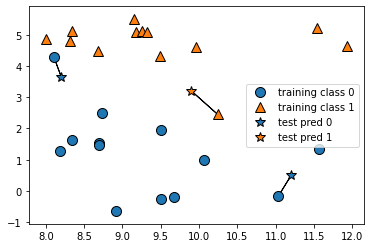

In [153]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

둘 이상의 이웃(k)을 선택할 경우에는 레이블을 정하기 위해 테스트 포인트 하나에 대해 클래스0에 속한 이웃이 몇 개인지, 클래스1에 속한 이웃이 몇 개인지 셈. 그리고 이웃이 더 많은 클래스를 레이블로 지정함. 다시 말하면 k-최근접 이웃 중에 다수의 클래스가 레이블이 됨. 최근접 이웃 3개를 사용하는 그림을 그림.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


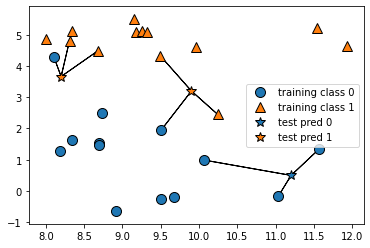

In [154]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

여기에서도 예측은 연결된 데이터 포인트의 색으로 나타냄. 새 데이터 포인트 중에 왼쪽 위의 것은 클래스 3개 중에 클래스1이 2개이면서 다수이므로 이웃을 하나만 사용했을 때와 예측이 달라짐.   
이 그림은 이진 분류 문제지만 클래스가 다수인 데이터셋에도 같은 방법을 적용할 수 있음. 클래스가 여러 개일 때도 각 클래스에 속한 이웃이 몇 개인지 헤아려서 가장 많은 클래스를 예측값으로 사용함.

사이킷런을 사용해서 k-최근접 이웃 알고리즘을 어떻게 적용하는지 살핌. 먼저 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눔.

In [155]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


`KNeighborsClassifier`를 임포트 하고 객체를 만들고 이웃의 수를 지정하는 `n_neighbors` 매개변수를 **3**으로 지정함.

In [156]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

훈련 세트를 사용하여 분류 모델을 학습시킴. `KNeighborsClassifier`의 학습은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것임.

In [157]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

테스트 데이터에 대해 `predict` 메서드를 호출하여 예측함. 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 후에 가장 많은 클래스를 찾음.

In [158]:
print('테스트 세트 예측:', clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


모델이 잘 일반화되었는지 평가하기 위해 `score` 메서드에 테스트 데이터와 테스트 레이블을 넣고 호출함.

In [159]:
print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


이 모델의 정확도는 86%로 측정됨. 모델이 테스트 데이터셋에 있는 샘플 중에 86%를 정확하게 예측한 것을 의미함.

### KNeighborsClassifier 분석

2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy평면에 그릴 수 있음. 더불어 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠함. 이 과정을 통해 알고리즘이 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 '결정 경계(decision boundary)'를 확인할 수 있음.

다음 코드는 이웃이 1, 3, 9개일 경우 결정 경계를 보여줌.

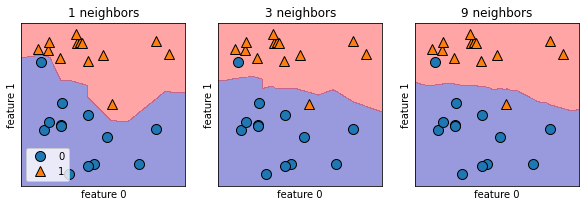

In [160]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    # 'fit' 메서드는 self 오브젝트를 리턴 하므로 객체 생성과 'fit' 메서드를 한 줄에 쓸 수 있음.
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbors'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

위 그림을 보면 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있으나, 이웃의 수를 늘릴수록 결정 경계가 점점 부드러워짐. 부드러운 경계는 더 단순한 모델을 의미함. 이웃을 적게 사용하면 모델 복잡도가 높아지고 많이 사용하면 복잡도는 낮아짐. 훈련 데이터 전체 개수를 이웃의 수로 지정하는 극단적인 경우에는 모든 테스트 포인트가 같은 이웃(모든 훈련 데이터)을 가지게 되므로 테스트 포인트에 대한 예측은 모두 같은 값이 됨. 즉 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 됨.

앞서 살펴봤던 모델 복잡도와 일반화 사이의 관계를 입증할 수 있는지 살펴봄. 이를 위해 실제 데이터인 유방암 데이터셋을 사용함. 먼저 훈련 세트와 테스트 세트로 나누고 이웃의 수를 다르게 해서 훈련 세트와 테스트 세트의 성능을 평가함.

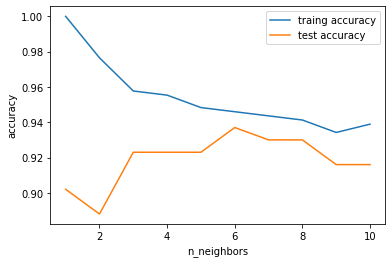

In [161]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 ~ 10까지 `n_neighbors`를 적용함.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델을 생성함.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도를 저장함.
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도를 저장함.
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='traing accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

이 그림은 `n_neighbors` 수(x축)에 따른 훈련 세트와 테스트 세트 정확도(y축)를 보여줌. 실제 이런 그래프는 매끈하게 나오지 않지만 여기서도 과대적합과 과소적합 현상을 볼 수 있음. 이웃의 수가 적을수록 모델이 복잡해지므로 그래프가 수평으로 뒤집힌 형태임. 최근접 이웃인 k의 수가 하나일 경우에는 훈련 데이터에 대한 예측이 완벽함. 그러나 이웃의 수가 늘어날수록 모델은 단순해지고 훈련 데이터의 정확도는 줄어듦. 이웃을 많이 사용했을 경우보다 이웃을 하나 사용한 테스트 세트의 정확도는 낮은데 이는 모델을 너무 복잡하게 만든 것을 의미함. 반대로 이웃을 10개 사용했을 경우에는 모델이 너무 단순해서 정확도는 더 나빠짐. 정확도가 가장 좋을 때는 중간 정도인 6개를 사용한 경우임. 그래프의 범위를 눈여겨보면 가장 나쁜 정확도도 88%여서 인정할 만함.

### k-최근접 이웃 회귀

k-최근접 이웃 알고리즘은 회귀 분석에도 쓰임. 이번에는 wave 데이터셋을 이용해서 이웃이 하나인 최근접 이웃을 사용함. x축에 테스트 데이터 3개를 흐린 별 모양으로 표시함. 최근접 이웃을 1개만 이용할 때 예측은 그저 가장 가까운 이웃의 타깃값이며 진한 별 모양으로 표시함.

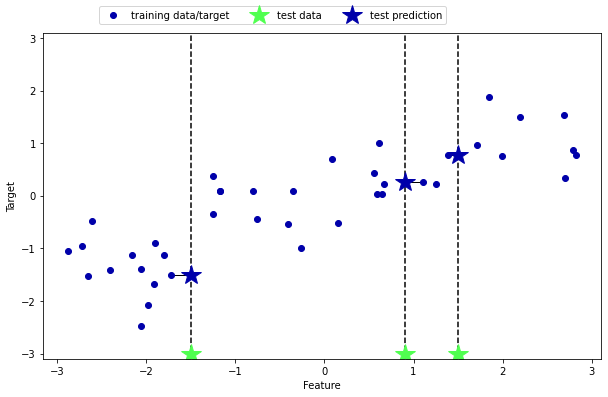

In [162]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

여기에서도 이웃을 둘 이상 사용할 수 있음. 최근접 이웃 여러 개를 사용하면 이웃 간 평균을 예측으로 삼음.

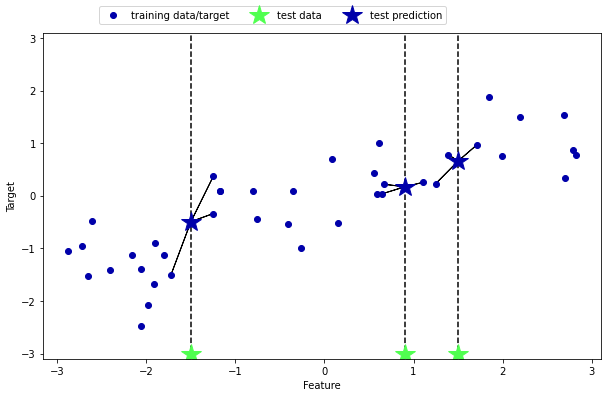

In [163]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

사이킷런에 회귀를 위한 k-최근접 이웃 알고리즘은 `KNeighborsRegressor` 클래스에 구현되어 있으며 사용법은 `KNeighborsClassifier` 클래스와 비슷함.

In [164]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눔.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 지정하여 모델의 객체를 만듦.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킴.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

테스트 세트에 대해 예측함.

In [165]:
print('테스트 세트 예측:\n', reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


`score` 메서드를 사용하여 모델을 평가함. 이 메서드는 회귀일 땐 '결정 계수'를 뜻하는 $R^2$ 값을 반환함. 이 값은 회귀 모델에서 예측의 적합도를 측정한 것으로 보통 0~1 사이 값임. 1은 완벽하게 예측한 경우이고, 0은 훈련 세트의 출력값인 'y_train'의 평균으로만 예측하는 모델의 경우임. 물론 음수가 될 수도 있는데 이 경우는 예측과 타깃이 상반된 경향을 가지는 것을 의미함.

$R^2 = 1-\frac{\sum_(y-\hat{y})^2}{\sum_(y-\overline{y})^2}$   

$y$는 타깃값, $\overline{y}$는 타깃값의 평균, $\hat{y}$는 모델의 예측값임.   
참고로 무조건 'y_train'의 평균값을 예측으로 사용하면 $R^2$의 공식에서 $\hat{y}$이 $\overline{y}$와 같게 되고 분자와 분모가 같아져서 최종 계산값은 0이 됨.

In [166]:
print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


점수가 0.83이므로 나름 잘 맞은 편임.

### KNeighborsRegressor 분석

이 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어서 예측할 수 있음. 이를 위해 x축을 따라 많은 포인트를 생성하여 테스트 데이터셋을 만듦.

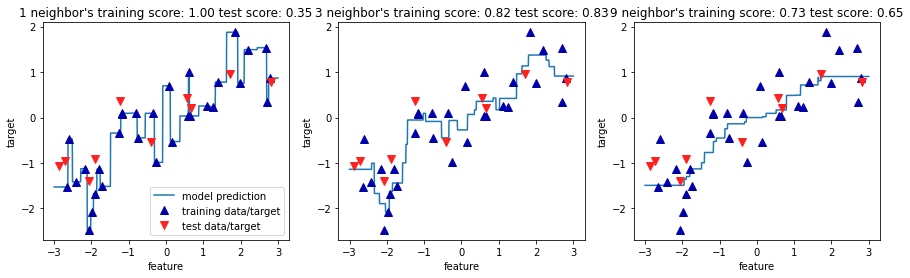

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3~3 사이에 데이터 포인트 1,000개를 만들고 2차원 배열로 바꿈.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 함.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor's training score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
axes[0].legend(['model prediction', 'training data/target', 'test data/target'], loc='best')

이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나가므로 매우 불안정하게 예측함. 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있으나 더 안정된 예측을 얻게 됨.

### 장단점과 매개변수

일반적으로 `KNeighbors` 분류기에 중요한 매개변수는 데이터 포인트 사이의 거리를 재는 방법, 이웃의 수임. 실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동하지만 신경 써서 조정해야 함. 거리 재는 방식은 더 다루지 않지만 기본적으로 여러 환경에서 잘 작동하는 방식은 '유클리디안 거리' 방식임.

'k-NN'의 장점은 이해하기 매우 쉬운 모델이라는 점, 많이 조정하지 않아도 자주 좋은 성능을 발휘한다는 점임. 더 복잡한 알고리즘을 적용하지 전에 시도해볼 수 있음.

보통 최근접 이웃 모델은 매우 빠르게 만들 수는 있지만 훈련 세트가 매우 크면(특성의 수나 샘플의 수가 크면) 예측이 느림. k-NN 알고리즘을 사용할 땐 데이터를 전처리 하는 과정(3장에서 다룸)이 중요함. 아울러 수백 개 이상의 많은 특성을 가진 데이터셋에는 잘 동작하지 않고 특성 값 대부분이 0인 희소한 데이터셋과는 특히 잘 작동하지 않음.

결론적으로 k-최근접 이웃 알고리즘은 이해하기 쉽지만 예측이 느리고 많은 특성을 처리하는 능력이 부족해서 현업에서 거의 쓰지 않음.

## 2.3.3 선형 모델

'선형 모델(linear model)'은 100여 년 전에 개발되었고 지난 몇십 년간 폭넓게 연구되며 현재도 널리 쓰임. 입력 특성에 대한 '선형 함수'를 만들어 예측을 수행함.

### 회귀의 선형 모델

회귀의 경우 선형 모델을 위한 일반화된 예측 함수는 다음과 같음.

$\hat{y} = w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b$

이 식에서 $x[0]$부터 $x[p]$까지는 데이터 포인트 하나에 대한 특성을 나타내며(특성 개수는 p + 1),   
$w$와 $b$는 모델이 학습할 파라미터임. $\hat{y}$은 모델이 만들어낸 예측값임. 특성이 하나인 데이터셋이라면 이 식은 다음과 같아짐.

$\hat{y} = w[0] \times x[0] + b$

$w[0]$은 기울기, $b$는 y축과 만나는 절편임. 특성이 많아지면 $w$는 각 특성에 해당하는 기울기를 모두 가짐. 다르게 생각하면 예측값은 입력 특성에 $w$의 각 가중치(음수일 수도 있음)를 곱해서 더한 가중치 합으로 볼 수 있음.

1차원 wave 데이터셋으로 파라미터 $w[0]$와 $b$를 직선처럼 되도록 학습시킴.

w[0]: 0.393906  b: -0.031804


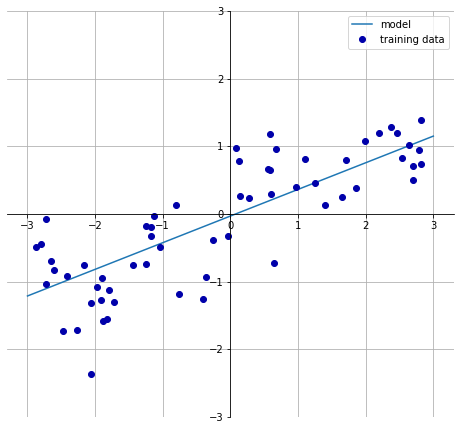

In [168]:
mglearn.plots.plot_linear_regression_wave()

직선 방정식을 이해하기 쉽도록 그래프의 중앙을 가로질러서 x, y축을 그림. $w[0]$ 값을 보면 기울기는 대략 0.4 정도여야 하며, 그래프에서 확인할 수 있음.

회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차원(특성이 더 많음)에서는 '초평면(hyperplane)'이 되는 회귀 모델의 특징을 가짐.

이 직선과 `KNeighborsRegressor`를 사용해서 만든 위 그래프의 선과 비교하면 직선을 사용한 예측이 제약이 더 많아 보임. 데이터의 상세 정보를 모두 잃어버린 것처럼 보임. 타깃 y가 특성들의 선형 조합이라는 건 매우 과하고 때론 비현실적인 가정임. 다만 1차원 데이터만 놓고 봐서 생긴 편견일 수 있는데, 특성이 많은 데이터셋이면 선형 모델은 매우 훌륭한 성능을 낼 수 있음. 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 훈련 세트에 대해서 선형 함수로 모델링 할 수 있음(선형 대수에서 방정식(훈련 데이터)보다 미지수(모델 파라미터)가 많은 경우를 '불충분한 시스템(underdetermined system)'이라고 하며 일반적으로 무수하게 많은 해가 존재함).

회귀를 위한 선형 모델은 다양함. 이 모델들은 훈련 데이터로부터 모델 파라미터 $w$와 $b$를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가 남. 아래부터는 회귀에서 가장 인기 있는 선형 모델들을 살핌.

### 선형 회귀(최소제곱법)

'선형 회귀(linear regression)' 또는 '최소제곱법(OLS, ordinary least squares)'은 가장 간단하고 오래된 회귀용 선형 알고리즘임. 예측과 훈련 세트에 있는 타깃 y 사이의 '평균제곱오차(mean squared error)'를 최소화하는 파라미터 $w$와 $b$를 찾음. 평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플 개수로 나눈 것임. 선형 회귀는 매개변수가 없는 것이 장점이지만 모델의 복잡도를 제어할 방법도 없음.

평균제곱오차의 공식은 MSE = $\frac{1}{n} \displaystyle\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$이고 n은 샘플 개수를 의미함.

선형 모델을 만듦.

In [169]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
# 2.3.3 선형 모델에 속한 장단점과 매개변수에서 `fit` 메서드를 연결하는 방식을 설명할 예정임.

기울기 파라미터($w$)는 '가중치(weight)' 또는 '계수(coefficient)'라고 하며 lr 객체의 `coef_` 속성에 저장됨. '편향(intercept)' 파라미터($b$)는 `intercept_` 속성에 저장됨.

In [170]:
print('lr.coef_:', lr.coef_)
print('lr.intercept_:', lr.intercept_)
# 사용자가 지정한 매개변수와 구분하고자 속성 뒤에 '_'를 붙임. 
# 즉 사이킷런의 경우는 훈련 데이터에서 유도된 속성은 항상 끝에 '_'를 붙임. 

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


`coef_` 속성은 각 입력 특성에 하나씩 대응되는 넘파이 배열임. wave 데이터셋에는 입력 특성이 하나뿐이므로 `lr.coef_`는 원소를 하나만 갖고 있음. `intercept_` 속성은 항상 실수값 하나임.

훈련 세트와 테스트 세트의 성능을 확인함.

In [171]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


$R^2$ 값이 0.66인 건 그리 좋은 결과라고 할 수 없음. 아울러 훈련 세트와 테스트 세트의 점수가 매우 비슷하면서 낮음. 이는 과소적합 상태를 의미함. 1차원 데이터셋에서는 모델이 매우 단순하거나 제한적이므로 과대적합이 일어날 가능성이 낮으나, 특성이 많은 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합이 일어날 가능성이 높음.

`LinearRegression` 모델이 보스턴 주택가격 데이터셋 같은 복잡한 데이터셋에서 어떻게 작동하는지 살핌. 이 데이터셋에는 샘플 506개, 특성은 위에서 특성공학으로 유도한 것까지 합쳐서 104개임. 먼저 데이터셋을 읽고 훈련 세트와 테스트 세트로 나눈 후에 선형 모델을 만듦.

In [172]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

훈련 세트와 테스트 세트의 점수를 비교함.

In [173]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


훈련 세트에서는 예측이 매우 정확한데 테스트 세트에서는 $R^2$ 값이 매우 낮음. 이러한 성능 차이는 모델이 과대적합 된 것을 나타내므로 복잡도를 제어할 수 있는 모델을 사용해야 함. 아래에서 설명하는 '리지(Ridge)'와 '라소(Lasso)'를 토대로 설명함.

### 리지 회귀

'리지(Ridge)'도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용함. 다만 리지 회귀에서의 가중치($w$) 선택은 훈련 데이터를 잘 예측하기 위한 목적뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음. 가중치의 절댓값을 가능한 한 작게 만드는 것임. 다시 말하면 $w$의 모든 원소가 0에 가깝게 되길 원함. 모든 특성이 출력에 주는 영향을 최소한으로 만든다(기울기를 작게 만든다)고 생각할 수 있음. 이런 제약을 '규제(regularization)'라고 하며 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미임. 리지 회귀에 사용하는 규제 방식을 'L2 규제'라고 함.

리지 회귀가 확장된 보스턴 주택가격 데이터셋에 어떻게 적용되는지 살핌.

In [174]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


결과를 보면 훈련 세트 점수는 `LinearRegression`보다 낮지만 테스트 세트에 대한 점수는 더 높음. 리지는 선형 회귀보다 덜 자유로운 모델이기 때문에 과대적합이 적어짐. 모델 복잡도가 낮아지면 훈련 세트에서 성능은 나빠지지만 더 일반화된 모델이 됨. 테스트 세트에 대한 성능을 제고해야 하므로 리지 모델을 선택해야 함.

리지는 모델을 단순하게(계수를 0에 가깝게) 하고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공함. 사용자는 `alpha` 매개변수로 훈련 세트 성능 대비 모델을 얼마나 단순화할지 지정할 수 있음. 앞의 예제에서는 `alpha` 매개변수의 기본값인 `1.0`을 사용했으나 이 값이 최적이라고 생각할 근거는 없음. 최적의 `alpha` 값은 사용하는 데이터셋마다 달라지며, `alpha` 값을 높이면 계수를 0에 더 가깝게 만들기 때문에 훈련 세트 성능은 나빠지지만 일반화하는 데 도움이 됨.

In [175]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 세트 점수: {:2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수: {:2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.788279
테스트 세트 점수: 0.635941


<img src='https://drive.google.com/uc?export=view&id=1G_gq95m6NAtmuVcs90CKCBBwozynDMys' width = 50% >   
`alpha` 값을 높이면 계수에 대한 제약이 강해지면서 그림의 왼쪽으로 이동함.   
반면에 `alpha` 값을 줄이면 계수에 대한 제약이 약해지면서 그림의 오른쪽으로 이동함. 아주 작은 `alpha` 값은 계수를 거의 제한하지 않으므로 `LinearRegression`으로 만든 모델과 거의 같아짐. (실험한 바에 의하면 `alpha` 값을 `0.00001`로 지정하면 `LinearRegression`에서 얻은 훈련 세트 점수 0.95, 테스트 세트 점수 0.61과 완전 동일해짐.)

In [176]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('훈련 세트 점수: {:2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수: {:2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.928227
테스트 세트 점수: 0.772207


`alpha` 값을 `0.1`로 지정했을 때 꽤 좋은 성능을 낸 것 같지만 여전히 과대적합 됨. 테스트 세트에 대한 성능이 높아질 때까지 값을 조정해야 함. 좋은 매개변수를 지정하는 방법은 5장에서 자세하게 다룰 예정임.

`alpha` 값에 따라 모델의 `coef_` 속성이 어떻게 달라지는지 조사하면 `alpha` 매개변수가 모델을 어떻게 변경시키는지 자세하게 이해할 수 있음. 작은 `alpha` 값일 때보다 높은 `alpha` 값일 때 제약이 더 많은 모델이므로 `coef_` 속성의 절댓값 크기는 더 작을 것으로 예상할 수 있음.

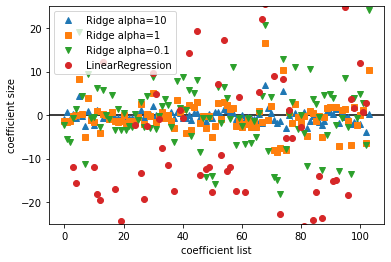

In [177]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('coefficient list')
plt.ylabel('coefficient size')

# 축의 범위를 제한하는 객체를 만듦.
xlims = plt.xlim()

# 수평선을 그림.
plt.hlines(0, xlims[0], xlims[1])

plt.xlim(xlims)
plt.ylim(-25, 25)

# 범례를 띄움.
plt.legend()

In [178]:
print(xlims[0])

-5.15


x축은 `coef_` 속성의 원소를 위치대로 나열한 것임. x=0은 첫 번째 특성에 연관된 계수이고 x=1은 두 번째 특성에 연관된 계수임. 이렇게 x=100까지 계속됨.

y축은 각 계수의 수치를 나타냄. `alpha=10`일 때 계수 대부분은 -3~3 사이에 위치하며, `alpha=1`일 때 계수는 좀 더 커졌음. `alpha=0.1`일 때 계수는 더 커지며 규제가 전혀 없는(`alpha=0`) 선형 회귀의 계수는 값이 더 커져서 그림 밖으로 넘어감.

규제의 효과를 이해하는 다른 방법은 `alpha` 값을 고정하고 훈련 데이터의 크기를 변화시키는 것임. 아래 그림은 보스턴 주택가격 데이터셋에서 여러 크기로 샘플링 해서 `LinearRegression`과 `Ridge(alpha=1)`을 적용한 것임. 이렇게 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 '학습 곡선(learning curve)'이라고 함(훈련 과정을 여러 번 반복하면서 학습하는 알고리즘에서는 반복 횟수에 따른 성능 변화를 나타내는 그래프를 학습 곡선이라고 함).

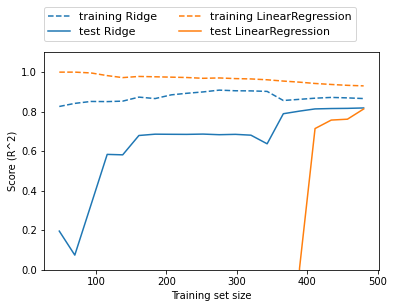

In [179]:
mglearn.plots.plot_ridge_n_samples()

모든 데이터셋에 대해 선형 회귀와 리지 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높음. 리지에는 규제가 적용되므로 리지의 훈련 데이터 점수가 전반적으로 선형 회귀의 훈련 데이터 점수보다 낮지만, 테스트 데이터에서는 리지의 점수가 더 높고 작은 데이터셋에서도 더 높음. 데이터셋 크기가 400 미만인 지점에서는 선형 회귀는 어떤 것도 학습하지 못하고 있음. 두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형 회귀가 리지 회귀를 따라잡음.

주목할 점은 데이터를 충분히 사용하면 규제 항은 덜 중요해지므로 리지 회귀와 선형 회귀의 성능이 같아진다는 것임. 그리고 데이터를 충분히 사용하면 선형 회귀의 훈련 데이터 성능이 점차 감소하는 것을 알 수 있는데, 이러한 이유는 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합 되기 어려워지기 때문임.

### 라소

선형 회귀에 규제를 적용하는 데 `Ridge`의 대안으로 `Lasso`가 있음. 라소 또한 리지처럼 계수를 0에 가깝게 만들려고 하지만 방식이 조금 다름. 'L1 규제' 라고 함. L1 규제의 결과로 어떤 계수는 0이 되기도 하는데 이 말은 모델에서 완전히 제외되는 특성이 생긴다는 의미임. '특성 선택(feature selection)'이 자동으로 이뤄진다고 할 수 있음. 일부 계수를 0으로 만들면 이해하기 쉬워지고 모델에서 가장 중요한 특성이 무엇인지 알 수 있게 함.

참고로 라소는 계수 벡터의 L1 노름을 페널티로 사용하며 다른 말로는 계수의 절댓값의 합임.   
평균제곱오차 식에 $\alpha\displaystyle\sum_{j=1}^{m}\begin{vmatrix} w_j\end{vmatrix}$항이 추가됨.   
리지와 마찬가지로 $\alpha$를 크게 하면 페널티의 효과가 커지고(가중치 감소), $\alpha$를 작게 하면 그 반대가 됨.

라소는 L1, L2 규제를 함께 쓰는 엘라스틱넷(Elastic-Net) 방식에서 L2 규제가 빠진 것임. 라소의 `alpha` 매개변수는 R의 엘라스틱넷 패키지인 `glmnet`의 `lambda` 매개변수와 같은 의미임. 이들은 한 특성씩 좌표축을 따라 최적화하는 '좌표 하강법(coordinate descent)' 방식을 사용하며 학습 과정이 반복적으로 여러 번 진행되면서 최적의 값을 찾아가게 됨.

확장된 보스턴 주택가격 데이터셋에 라소를 적용함.

In [180]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso.score(X_test, y_test)))
print('사용한 특성의 개수:', np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


훈련 세트와 테스트 세트 모두 결과가 안 좋음. 과소적합임. 특성 104개 중 4개만 사용했음. 라소도 리지처럼 계수를 조정하는 `alpha` 매개변수를 지원함. 위에서는 기본값 **1.0**을 사용했으나 이번엔 과소적합을 줄이고자 `alpha` 값을 줄임. 여기서 `max_iter` 매개변수 값을 늘려야 하는데, 이 매개변수는 반복 실행하는 최대 횟수를 의미함. 이 값을 늘리지 않으면 값을 늘리라는 경고가 발생함.

In [181]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('사용한 특성의 개수:', np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


`alpha` 값을 낮추면 모델 복잡도는 커지고 훈련 세트와 테스트 세트에서의 성능이 좋아짐. 성능은 리지보다 조금 나은데 사용된 특성은 33개뿐이라서 모델을 분석하기 좀 더 쉬움.

그러나 `alpha` 값을 너무 낮추면 규제 효과가 없어져서 과대적합이 되므로 `LinearRegression`의 결과와 비슷해짐.

In [182]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('사용한 특성의 개수:', np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


`alpha` 값이 다른 모델들의 계수를 그래프로 그림. 비교를 쉽게 하고자 리지 회귀를 원 모양으로 나타냄. 

Text(0, 0.5, 'coefficient size')

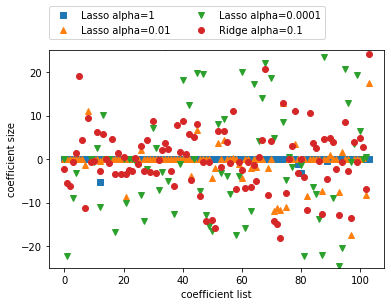

In [183]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('coefficient list')
plt.ylabel('coefficient size')

`alpha=1`일 때 계수 대부분이 0일 뿐만 아니라 나머지 계수들도 크기가 작은 걸 알 수 있음. `alpha=0.01`일 때 특성 대부분이 0이 되는 분포를 얻음. `alpha=0.0001`일 때 계수 대부분이 0이 아니고 값도 커져서 상당히 규제받지 않은 모델을 얻음. `alpha=0.1`인 리지 모델은 `alpha=0.01`인 라소 모델과 성능이 비슷하지만 리지를 사용하면 어떤 계수도 0이 되지 않음.

실제로 리지와 라소 중에 더 선호하는 모델은 리지임. 다만 특성이 많고 그중에 일부분만 중요하거나 분석하기 쉬운 모델을 원한다면 입력 특성 중 일부만 사용하는 라소가 더 좋은 선택일 수 있음.

사이킷런은 라소와 리지의 페널티를 결합한 `ElasticNet`도 제공하는데, 실제로 이 조합은 최상의 성능 내지만 L1 규제와 L2 규제를 위한 매개변수 2개를 조정해야 함. `ElasticNet`에 있는 `l1_ratio` 매개변수는 `R`의 `glimnet` 패키지의 `alpha` 매개변수와 동일한 것이며, L1 규제와 L2 규제의 비율을 조정함. `l1_ratio`는 **0**과 **1** 사이의 값을 지정하며 L2 비율은 1-`l1_ratio`가 됨. `ElasticNet`의 규제 식은 `alpha` $\times$ `l1_ratio` $\times \displaystyle\sum_{j=1}^{m}\begin{vmatrix} w_j\end{vmatrix} + \frac{1}{2} \times$ `alpha` $ \times $ (1-`l1_ratio`) $\times \displaystyle\sum_{j=1}^{m} w^2_j$ 이며, 이 식의 L1 규제와 L2 규제를 `l1`, `l2`라는 매개변수로 표현하면 $l_1 \times \displaystyle\sum_{j=1}^{m}\begin{vmatrix} w_j\end{vmatrix} + \frac{1}{2} \times l_2 \times \displaystyle\sum_{j=1}^{m} w^2_j$이 됨. 이때 `alpha` = `l1` + `l2`가 되고 `l1_ratio` = $\frac{l_1}{l_1+l_2}$가 되므로 필요한 규제의 정도인 `l1`, `l2`에 맞추어 `alpha`와 `l1_ratio`를 지정할 수 있음.

### 분류용 선형 모델

선형 모델은 분류에도 널리 사용함. 먼저 이진 분류(binary classification)의 경우 예측을 위한 방정식은 아래와 같음.

$\hat{y} = w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b > 0$

선형 회귀와 아주 비슷한 방정식이지만 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교함. 0보다 작으면 클래스를 -1로 예측하고, 0보다 크면 +1로 예측함. 이 규칙은 분류에 쓰이는 모든 선형모델과 동일하며, 계수($w$)와 절편($b$)를 찾기 위한 방법이 많이 존재함.

회귀용 선형 모델에서는 출력 $\hat{y}$이 특성의 선형 함수였음. 직선, 평면, 초평면(차원이 3 이상)을 의미함. 반면에 분류용 선형 모델에서는 '결정 경계'가 입력의 선형 함수임. 다른 말로 (이진) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기임.

선형 모델을 학습시키는 알고리즘은 다양한데 다음 두 방법으로 구분할 수 있음.
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법.
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식을 택하여 적용하는 방법.

알고리즘들은 훈련 세트를 잘 학습하는지 측정하는 방법이 각기 다름. 다만 수학적, 기술적 이유로 알고리즘들이 만드는 잘못된 분류의 수를 최소화하도록 $w$와 $b$를 조정하는 것은 불가능함. 물론 많은 애플리케이션에서 앞 목록의 첫 번째 항목(손실 함수(loss function))에 대한 차이는 크게 중요하지 않음.

유명한 선형 분류 알고리즘은 '로지스틱 회귀(logistic regression)'와 선형 '서포트 벡터 머신(support vector machine)'임. 이 중에 로지스틱 회귀라는 명칭에 회귀가 들어가지만 회귀 알고리즘과 전혀 관련이 없는 분류 알고리즘임.

- 참고
 - 로지스틱 회귀는 선형 함수에 시그모이드 함수가 적용된 것으로 종종 표현되며, 분류의 기준이 되는 시그모이드 함수의 결괏값은 0.5로 선형 함수가 0일 때이므로 선형 함수를 기준으로도 나타낼 수 있음. 사이킷런에서 로지스틱 회귀의 `predict` 메서드는 선형 함수 값을 계산하는 `decision_function` 메서드를 사용하여 0을 기준으로 예측을 만들며, 시그모이드 함수를 적용한 확률값은 `predict_proba` 메서드에서 제공함.
 - 분류에서 잘못 분류된 결과를 직접 나타내는 0-1 손실 함수는 완전한 계단 함수이므로 대리할 수 있는 다른 함수(surrogate loss function)를 사용하여 최적화를 수행함.
 - `LogisticRegression` 클래스는 이진 분류에서 '로지스틱(logistict)' 손실 함수를 사용하고, 다중 분류에서는 '크로스 엔트로피(cross entrophy)' 손실 함수를 사용함. `solver` 매개변수를 지정하지 않으면 사이킷런 0.22 버전부터 기본값이 `lbfgs`로 변경된다는 경고 메시지가 출력됨.
 - `LinearSVC` 클래스는 기본값으로 '제곱 힌지(squared hinge)' 손실 함수를 사용함. `liblinear`를 사용하는 `LogisticRegression` 클래스와 `LinearSVC` 클래스는 사이킷런 0.20 버전부터 `verbose` 매개변수와 상관없이 알고리즘이 `max_iter` 반복 안에 수렴하지 않으면 반복 횟수를 증가하라는 경고를 출력함. `LogisticRegression` 클래스의 `max_iter` 매개변수의 기본값은 `100`, `LInearSVC`의 `max_iter` 매개변수의 기본값은 `1,000`임.

forge 데이터셋을 사용하여 `LogisticRegression` 모델과 `LinearSVM` 모델을 만들고 이 선형 모델들이 만든 결정 경계를 그림으로 나타냄. 기본 매개변수를 사용함.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


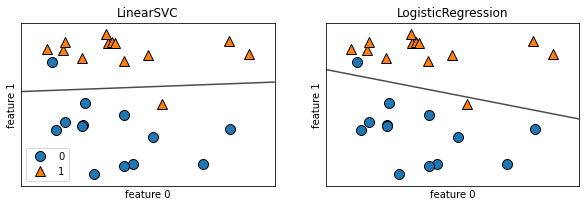

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC # 'SVC'는 'support vector classifier'의 약자임.

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend()

forge 데이터셋의 첫 번째 특성을 x축에, 두 번째 특성을 y축에 놓았음. 결정 경계를 직선으로 표시했고 위쪽은 클래스1, 아래쪽은 클래스0으로 분류됨. 두 모델 모두 데이터 포인트를 각 2개씩 잘못 분류함. 여하튼 두 모델 모두 L2 규제를 기본으로 사용함.

두 모델에서 규제 강도를 결정하는 매개변수는 `C`이며 기본값은 **1.0**임. 이 값이 높아지면 규제 강도가 감소하여 훈련 세트에 최대로 맞추고(각각 데이터 포인트를 정확하게 분류하고), 값이 낮아지면 규제 강도가 증가하여 계수 벡터($w$)가 0에 가까워지도록 만듦(데이터 포인트 중 다수에 맞춤). 참고로 매개변수 `C` 는 소문자가 아닌 대문자임.

`LinearSVC` 클래스에 다른 `C` 값을 지정하여 만든 `LinearSVM` 모델의 결정 경계를 그림.

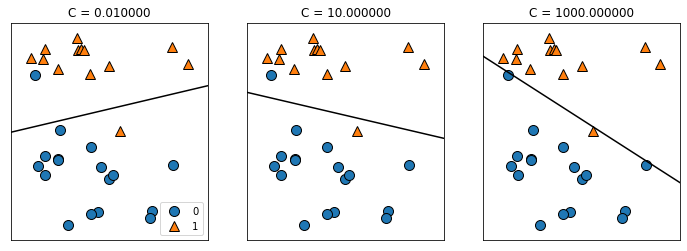

In [185]:
mglearn.plots.plot_linear_svc_regularization()

첫 번째 그림의 경우 매우 작은 값을 지정했기 때문에 규제가 많이 적용되었고, 클래스0 대부분은 아래에 있고 클래스1 대부분은 위에 있음. 규제가 강해지면서 비교적으로 수평에 가까운 결정 경계를 형성함. 잘못 분류한 데이터 포인트는 2개임.   

중간 그림의 경우 값을 높여서 지정했기 때문에 잘못 분류한 두 샘플에 민감해지면서 결정 경계가 기울었음.

세 번째 그림의 경우 값을 매우 높여서 지정했기 때문에 결정 경계는 더 기울었고 클래스0의 모든 데이터 포인트를 올바로 분류했음. 다만 이 데이터셋은 직선만으로는 모든 데이터 포인트를 분류할 수 없으므로 클래스1의 데이터 포인트 1개는 분류해낼 수 없었음. 과대적합된 모델임.

회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이므로 매우 제한적임. 그러나 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 특성이 많아지면 과대적합 되지 않도록 주의해야 함.

유방암 데이터셋을 사용하여 `LogisticRegression`을 분석함. 책에 나온 점수와 다르게 출력됨. 이유는 잘 모르겠지만 추측하건대 사이킷런 버전이 업데이트 되면서 알고리즘이 변화했을 가능성이 높음.

In [186]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg.score(X_train, y_train)))
print('테스트 세트 점수: {:3f}'.format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.958042


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


`C`의 기본값 `1`이 각 세트 점수에 꽤 좋은 성능을 내고 있지만 테스트 세트 점수가 훈련 세트 점수보다 높으므로 과소적합임.


모델 제약을 풀어보기 위해 `C` 값을 증가시킴.

In [187]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수: {:3f}'.format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.944056


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


`C` 값을 `100`으로 지정하였더니 훈련 세트 정확도가 증가하고 테스트 세트 정확도도 약간 증가함. 복잡도가 높은 모델일수록 성능이 좋다는 점을 의미함. 책에 나온 점수와 다르게 출력됨. 이유는 위에서 얘기했던 바와 같이 사이킷런 업데이트로 추측함.





규제를 더 강하게 하기 위해 `C` 값을 `0.001`로 내림.



In [188]:
logreg001 = LogisticRegression(C=0.001).fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('테스트 세트 점수: {:3f}'.format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.951
테스트 세트 점수: 0.944056


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 <img src='https://drive.google.com/uc?export=view&id=1G_gq95m6NAtmuVcs90CKCBBwozynDMys' width = 50% >

그림을 기준으로 설명하자면 이미 과소적합 된 모델에서 왼쪽으로 더 이동하므로 `C` 값이 기본값일 때보다 두 세트의 정확도는 더 낮아짐. 책에 나온 점수와 다르게 출력됨. 이유는 알아내지 못했음.

`C` 값을 다르게 하여 학습시킨 모델의 계수를 확인함.

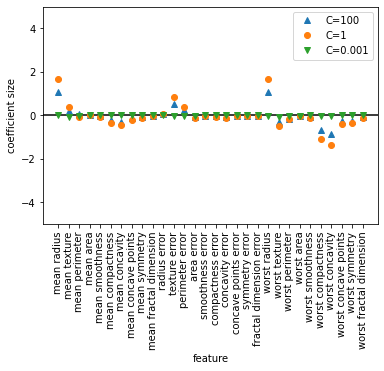

In [189]:
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('feature')
plt.ylabel('coefficient size')
plt.legend()

책에 나온 그래프와 다르게 출력됨. 이유는 알아내지 못했음. 아울러 출력된 그래프에 대한 설명 또한 적합하지 않은 부분이 많음. 아래 설명은 책에 있는 내용을 그대로 옮겼을 뿐이며 실제 그래프와는 맞지 않는 내용이 있다는 점을 참고 바람.

여하튼 `LogisticRegression`은 기본으로 L2 규제를 적용하므로 `Ridge`로 만든 모습과 유사함. 규제를 강하게 할수록 계수들을 0에 더 가깝게 만들지만 완전히 0이 되지는 않음.

세 번째 계수(mean perimeter)의 경우, `C=100`, `C=1`일 때 계수가 음수지만 , `C=0.001`일 때 양수가 되며 `C=1`일 때보다도 절댓값이 더 큼. 이런 모델을 해석하면 계수가 클래스와 특성의 연관성을 알려줄 수 있음. 예를 들면 'texture error' 특성 악성인 샘플과 관련이 깊으나 'mean perimeter' 계수의 부호가 바뀌는 것으로 보면 높은 'mean perimeter' 값은 양성이나 악성의 신호 모두가 될 수 있음. 따라서 선형 모델의 계수는 항상 의심하고 조심하면서 해석해야 함.

더 이해하기 쉬운 모델이라면 특성 몇 개만 사용하겠지만 L1 규제를 사용하는 것이 좋음. L1 규제를 사용할 경우 분류 정확도와 계수 그래프를 그림. 사이킷런 0.22 버전부터 `LogisticRegression` 클래스의 `solver` 매개변수 기본값이 `lbfgs`로 바뀜. 이 알고리즘은 L1 규제를 지원하지 않으므로 L1 규제를 사용하려면 `solver` 매개변수에 `liblinear`로 지정해야 함.

C=0.001 인 로지스틱 회귀의 훈련 정확도: 0.92
C=0.001 인 로지스틱 회귀의 테스트 정확도: 0.94
C=1.000 인 로지스틱 회귀의 훈련 정확도: 0.95
C=1.000 인 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 로지스틱 회귀의 훈련 정확도: 0.97
C=100.000 인 로지스틱 회귀의 테스트 정확도: 0.97


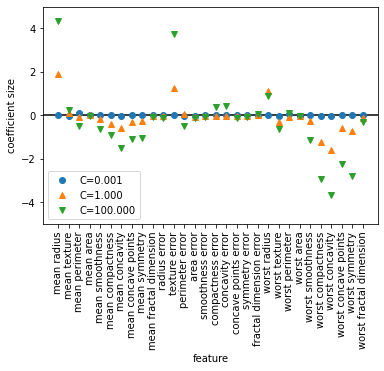

In [190]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear').fit(X_train, y_train)
    print('C={:.3f} 인 로지스틱 회귀의 훈련 정확도: {:.2f}'.format
          (C, lr_l1.score(X_train, y_train)))
    print('C={:.3f} 인 로지스틱 회귀의 테스트 정확도: {:.2f}'.format
          (C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel('feature')
plt.ylabel('coefficient size')
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

이 그래프 역시 책에서 출력된 모습과 다름. 이유는 알 수 없으나 아마도 사이킷런 버전이 업데이트 되면서 알고리즘에 변화가 생긴 것으로 추측함.

아무튼 책에서 설명하는 내용은, 이진 분류에서 선형 모델과 회귀에서 선형 모델 사이에는 유사점이 많음. 회귀에서처럼 모델들의 주요 차이는 규제에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 `penalty` 매개변수임(사이킷런 0.22 버전부터는 `solver` 매개변수로 바뀜).

### 다중 클래스 분류용 선형 모델

로지스틱 회귀의 경우 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원하고, 많은 선형 분류 모델은 이진 분류만 지원함. 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 '일대다(one-vs.-rest, one-vs.-all)' 방법임. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시키므로 클래스의 수만큼 이진 분류 모델이 만들어지며, 모든 이진 분류기가 작동하면서 가장 높은 점수를 가지는 분류기의 클래스를 예측값으로 선택함.

클래스별 이진 분류기를 만들면 각 클래스가 계수 벡터($w$)와 절편($b$)을 갖게 되며, 분류 신뢰도를 나타내는 다음 공식의 결괏값이 가장 높은 클래스가 해당 데이터의 클래스 레이블로 할당됨. 절편($b$)는 무조건 하나만 가짐.

$w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b$

다중 클래스 로지스틱 회귀 이면의 수학은 일대다 방식과 다르지만 클래스마다 계수 벡터와 절편을 만드는 것은 같으며 예측 방법도 같음.

- 참고

 - `LogisticRegression`과 `LinearSVC`에 있는 `multi_class` 매개변수의 기본값은 일대다를 의미하는 `ovr`임. 사이킷런 0.20 버전에서 이 매개변수 옵션에 `auto`가 추가되었는데 이 `auto`로 지정하면 이진 분류이거나 `solver` 매개변수 값이 `liblinear`이면 `ovr`을 선택하고 그 외에는 `multinomial`을 선택함. `multi_class` 매개변수를 지정하지 않으면 기본값이 `ovr`에서 `auto`로 변경된다는 경고가 출력됨.

 - 다중 클래스 로지스틱 회귀 공식은 $Pr(Y_i=c)=\frac{e^{w_c \cdot X_i}}{\displaystyle\sum_{k=1}^K e^{w_k \cdot X_i}}$이며 i번째 데이터 포인트 $X_i$의 출력 $Y_i$가 클래스 $c$일 확률 $Pr(Y_i=c)$는 K개의 클래스에 대한 각각의 계수 $W$를 데이터 포인트에 곱해서 지수함수를 적용한 합으로 클래스 $c$에 대한 값을 나누어 계산함. 보통 소프트맥스 함수의 표현에서 수식을 간소화하기 위해 절편($b$)는 계수 벡터($W$)에 포함된 것으로 나타냄. 즉 다중 클래스 로지스틱 회귀에도 클래스마다 계수 벡터와 절편이 있음.

클래스 3개를 가진 2차원 데이터셋에 일대다 방식을 적용함. 각 클래스의 데이터는 '정규분포(가우스안 분포)'를 따름.

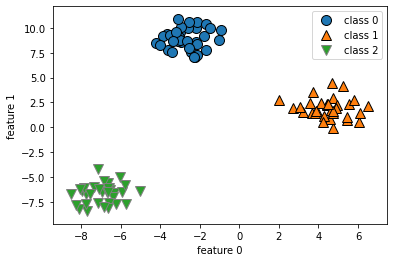

In [191]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

클래스 별로 잘 모여있음.

이 데이터셋으로 `LinearSVC` 분류기를 훈련함.

In [192]:
linear_svm = LinearSVC().fit(X, y)
print('계수 배열 크기: ', linear_svm.coef_.shape)
print('절편 배열 크기: ', linear_svm.intercept_.shape)

계수 배열 크기:  (3, 2)
절편 배열 크기:  (3,)


계수의 경우 행은 클래스 3개에 각각 대응하는 계수 벡터를 의미하며, 열은 각 특성에 따른 계수 값(이 데이터셋은 특성이 2개)을 의미함. 절편의 경우 1차원 벡터임.

이진 분류기 3개가 만드는 경계를 시각화함.

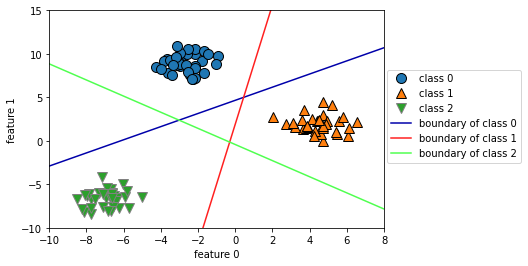

In [193]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'boundary of class 0', 'boundary of class 1', 'boundary of class 2'], loc=(1.01, 0.3))

클래스 0에 속한 데이터 포인트는 클래스 0의 구분선 위에 위치하며 이는 이진 분류기가 만든 클래스 0 공간에 위치하는 것임. 그러나 클래스 0에 속한 데이터 포인트는 클래스 2의 구분선의 위에 위치하며 이는 이진 분류기에 의해 나머지로 분류됨. 아울러 클래스 0에 속한 데이터 포인트는 클래스 1의 구분선의 좌측에 위치하며 이 또한 이진 분류기에 의해 나머지로 분류됨. 따라서 이 공간의 어떤 데이터 포인트든 클래스 0으로 분류할 것으로 예상함(클래스 0 분류 신뢰도는 0보다 크고, 다른 두 클래스는 0보다 작을 것임).

그러나 중앙에 위치한 삼각형 공간의 경우 모두 나머지로 분류했으므로 이곳에 위치한 데이터 포인트는 분류 공식의 결과가 가장 높은 클래스로 예측될 것임. 직선에 가장 근접한 클래스로 예측한다는 의미임.

2차원 평면의 모든 데이터 포인트에 대한 예측 결과를 그림. 일대다 분류기 3개가 만든 다중 클래스 결정 경계를 나타냄.

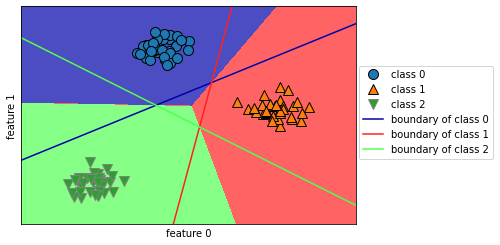

In [194]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'boundary of class 0', 'boundary of class 1', 'boundary of class 2'], loc=(1.01, 0.3))

### 장단점과 매개변수

선형 모델의 주요 매개변수는 회귀 모델의 경우 `alpha`이고, 분류의 경우 `C`임. `alpha` 값은 클수록, `C` 값은 작을수록 모델이 단순해짐. 보통 두 매개변수는 로그 스케일(자릿수가 바뀌도록 10배씩 변경하는데 0.001, 0.01, 0.1, 1, 10, 100...)로 최적치를 정함.

그리고 L1 또는 L2 규제를 사용할지 정함. 중요한 특성이 많지 않거나 특성을 줄이려면  L1 규제, 중요한 특성이 많으면 L2 규제를 사용함. L1을 사용하면 특성을 조금만 사용하므로 모델을 분석하기 용이함. 중요한 특성이 무엇인지, 그 영향은 어느 정도인지 파악하기 쉬움.

선형 모델은 학습 속도가 빠르고 예측도 빠름. 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동함. 대용량 데이터셋이라면 기본 설정보다 빨리 처리하도록 `LogisticRegression`과 `Ridge`의 `solver` 매개변수에 `'sag'`(사이킷런 0.19 버전으로 업데이트 하면서 성능을 개선한 `saga`가 추가됨.)를 지정함. `sag`는 'Stochastic Average Gradient descent(확률적 평균 경사 하강법)'의 약자로 일반적인 경사 하강법과 비슷하지만 반복이 진행될 때 이전에 구한 모든 경사의 평균을 사용해서 계수를 갱신함. 

다른 방법으로는 선형 모델의 대용량 처리 버전으로 구현된 `SGDClassifier`, `SGDRegressor`를 사용함. 'SGD'는 'Stochastic Gradient Descent(확률적 경사 하강법)'의 약자임.

선형 모델이 가진 다른 장점은 회귀와 분류에서 공식을 토대로 만들어진 예측에 대해 비교적 쉽게 이해할 수 있다는 점임. 다만 데이터 특성들이 서로 깊게 연관될수록 계수 값에 대해 설명하기 어렵고 분석하기도 매우 어려움.

선형 모델은 샘플보다 특성이 더 많을 때 잘 작동하고, 다른 모델로 학습하기 어려운 큰 데이터셋에 선형 모델을 많이 사용함. 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋으므로 선형 모델을 우선 시도하지 않음. SVM에서 선형 모델이 실패하는 예를 살펴볼 예정임.

선형 모델 파트를 마무리하기 전에 '메서드 연결(method chaining)'에 대해 설명함. 메서드 호출을 잇는 것(여기서는 `__init__`와 `self`)을 의미함. `__init__`은 객체가 생성될 때 자동으로 호출되는 특수한 메서드(생성자)이며, `self`는 호출된 메서드를 정의한 객체 자신을 의미함.

모든 사이킷런의 `fit` 메서드는 학습된 모델인 `self`를 반환하고 이를 변수 'logreg'에 할당함.

`logreg = LogisticRegression().fit(X_train, y_train)`

`fit` 메서드와 `predict` 메서드를 한 줄에 쓰는 메서드 연결도 자주 사용함. 모델의 객체를 만들고 훈련하고 예측하는 일을 한 줄에 씀.

`logreg = LogisticRegression()`

`y_pred = logreg(X_train, y_train).predict(X_test)`

`y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)`

물론 이런 방식은 코드를 읽기 어려워지므로 바람직하지 않음. 아울러 학습된 로지스틱 회귀 모델은 변수에 할당되지 않으므로(예측값을 가진 변수만 남으므로) 다른 데이터에 대해 예측하거나 만들어진 모델을 분석할 수 없음. 





## 2.3.4 나이브 베이즈 분류기

'나이브 베이즈(naive bayes)' 분류기는 선형 모델과 매우 유사함. `LogisticRegression`과 `LinearSVC`보다 훈련 속도가 빠르지만 일반화 성능이 약간 떨어짐.

나이브 베이즈 분류기가 효과적인 이유는 각 특성을 개별로 취급해서 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문임. 나이브 베이즈 분류기의 종류는 아래 3가지임.

- `GaussianNB` : 연속적 데이터에 적용할 수 있음.
- `BernoulliNB` : 이진(이산적) 데이터에 적용할 수 있음.
- `MultinomialNB` : 이진(이산적) 데이터이면서 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트로, 예를 들면 문장에 나타난 단어의 횟수임)에 적용할 수 있음.

`BernoulliNB`과 `MultinomialNB`는 주로 텍스트 데이터를 분류할 때 사용함.

`BernoulliNB` 분류기는 각 클래스의 특성 중에 0이 아닌 것이 몇 개인지 셈.

In [195]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

이진 특성을 가진 데이터 포인트 4개가 있고 클래스는 0, 1임. 출력 y의 첫 번째, 세 번째 클래스는 0임. 첫 번째 특성은 0이 두 번이고 0이 아닌 것은 한 번도 없음. 두 번째 특성은 0이 한 번이고 1도 한 번임. 같은 방식으로 두 번째 클래스에 해당하는 데이터 포인트도 계산함. 이해하기 어려우면 아래 코드를 참고할 것.

클래스별로 0이 아닌 원소를 세는 과정을 요약함. 클래스 값이 0이나 1이므로 1이 나타난 횟수를 세면 특성의 값을 모두 더한 게 됨. 프린트를 추가로 달아서 이해하기 쉽도록 출력함.

In [196]:
# 각 클래스마다 리스트를 저장하기 위해 딕셔너리를 공백으로 둠.
counts = {}
# 각 클래스를 하나씩만 출력하기 위해 넘파이 `unique()` 함수를 사용함.
for label in np.unique(y):
    print(label)
    # 각 클래스에 대해 반복함. 특성마다 1이 나타난 횟수를 더함.
    # `axis`를 0로 지정하면 행을 기준으로 더함. 특성마다 아래로 더한다는 의미임.
    # `axis`를 1로 지정하면 열을 기준으로 더함. 데이터 포인트 전체 값을 (오른쪽으로) 더한다는 의미임.
    counts[label] = X[y == label].sum(axis=0)
    print(y == label)
    # True에 속한 행을 추출함.
    print(X[y == label])
    print(counts[label])
    print()
print('특성 카운트: ', counts)

0
[ True False  True False]
[[0 1 0 1]
 [0 0 0 1]]
[0 1 0 2]

1
[False  True False  True]
[[1 0 1 1]
 [1 0 1 0]]
[2 0 2 1]

특성 카운트:  {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


클래스 0인 경우, 즉 첫 번째, 세 번째 행에서 1이 나타난 횟수를 행(`axis=0`)을 따라 더하면 [0, 1, 0, 2]이 되며, 클래스 1인 경우 두 번째, 네 번째 행에서 1이 나타난 횟수를 행을 따라 더하면 [2, 0, 2, 1]이 됨.

`multinomialNB`는 클래스별로 특성의 평균을 계산하고, `GaussianNB`는 특성의 표준편차와 평균을 계산함. 예측할 땐 데이터 포인트를 클래스의 통계 값과 비교해서 가장 잘 맞는 클래스를 예측값으로 정함.

`multinomialNB`와 `BernoulliNB`의 예측 공식은 선형 함수처럼 데이터 포인트에 `coef_`를 곱하고 `intercept_`를 더하는 방식과 같음. 다만 나이브 베이즈 모델의 `coef_`는 특성 카운트 수를 로그 변환한 형태이고(기울기 $w$가 아니고), `intercept_`는 클래스 카운트 수를 로그 변환한 것임.

### 장단점과 매개변수

`GaussianNB`는 매우 고차원인 데이터셋에 사용함.

`MultinomialNB`와 `BernoulliNB`는 모델 복잡도를 조절하는 `alpha` 매개변수를 가짐. `alpha`가 주어지면 알고리즘이 양의 값을 가진 가상의 데이터 포인트를 모든 특성에 `alpha` 개수만큼 추가하여 통계 데이터를 완만하게 함. `alpha` 값이 클수록 더 완만해지고 모델 복잡도는 낮아짐. `alpha`에 따른 알고리즘 성능 변화는 크지 않아서 이 값 자체가 성능 향상에 크게 좌우하진 않지만 어느 정도 정확도는 제고할 수 있음. 이 두 베이즈 모델은 텍스트 같은 희소한 데이터를 세는 데 사용하며, 보통 0이 아닌 특성이 많은 데이터셋(큰 문서 같은 것들)에서 `MultinomialNB`가 `BernoulliNB`보다 성능이 좋음.

나이브 베이즈 모델과 선형 모델의 장단점은 비슷함. 훈련과 예측 속도가 빠르고 훈련 과정을 이해하기 쉬움. 희소하고 고차원인 데이터셋에서 잘 작동하며 매개변수에 비교적 민감하지 않음. 선형 모델을 사용해서 학습 시간이 오래 걸리는 큰 데이터셋에는 나이브 베이즈 모델이 적합할 수 있고 실제로도 자주 사용함.

## 2.3.5 결정 트리

'결정 트리(decision tree)'는 분류, 회귀 모두 널리 사용하는 모델이며 예/아니오로 된 연속적인 질문을 던지면서 결정을 향해 다다르는 학습 방식을 가짐. 스무고개 같다고 볼 수 있음.

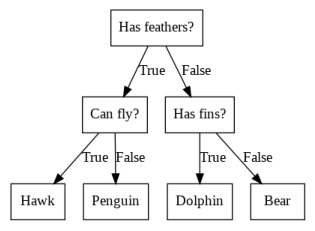

In [197]:
mglearn.plots.plot_animal_tree()

'노드(node)'는 질문이나 정답을 가진 네모이며, 마지막 노드는 '리프 노드(leaf node)'라고 함. '에지(edge)'는 질문의 답과 다음 질문을 연결하는 화살표선 임.

### 결정 트리 만들기

각 데이터포인트가 50개씩 있는 2차원 데이터셋을 분류하는 결정트리를 만듦. 정답에 가장 빨리 도달하는 예/아니오로 이뤄진 질문 목록을 학습하는 과정이 결정 트리를 학습하는 것을 의미함. 이런 질문들을 테스트(테스트 세트와 다른 의미)라고 함. 보통 데이터는 예/아니오로 구분되지 않고 연속된 특성으로 구분되므로 어떤 특성이 어떤 특성의 값보다 (같거나)큰지 작은지와 같은 형식으로 테스트 함.
<img src='https://drive.google.com/uc?export=view&id=1BMSrD9BcAjMrVZW4N6GVY0yr7KStXSq0' width = 50% >

가능한 한 모든 테스트에서 타깃값에 대해 가장 많은 정보를 가진 것을 고름. 데이터셋을 x[1]=0.06에서 수평적으로 나누는 것이 가장 많은 정보를 포함함. 이 직선이 클래스0과 클래스1에 각각 속한 데이터 포인트를 가장 잘 나눔.

맨 위에 위치한 루트노드는 클래스0과 클래스1에 각각 속한 데이터 포인트 50개를 나타냄([클래스0의 개수, 클래스1의 개수]). 테스트 X[1]<=0.06를 통과하면 왼쪽 노드, 통과하지 못하면 오른쪽 노드로 감. 그림에서 아랫부분이 왼쪽 노드, 윗부분이 오른쪽 노드를 나타냄. 첫 번째 분류 시도가 두 클래스를 완벽하게 구분하지 못했으므로 각각 클래스가 양쪽 노드에 포함됨.
<img src='https://drive.google.com/uc?export=view&id=1BG88SYxELbjWOs7JdiTal0OIX6_0abVs' width = 70% >

테스트를 반복하면 그림처럼 구간을 더 나눔.
<img src='https://drive.google.com/uc?export=view&id=1q2U9Dv4ICIK1rxi5bRbs94xc475pVQAr' width = 70% >

테스트를 반복하면 각 노드가 테스트를 하나씩 가진 이진 결정 트리를 계속 만듦. 그림으로 설명하면 각 테스트는 축을 따라 데이터를 둘로 나눠감. 이를 계층적으로 영역을 분할하는 알고리즘으로 할 수 있음. 각 테스트는 특성 하나로만 진행되므로 나뉜 영역은 항상 축에 평행한 형태를 취함.

이런 식으로 진행하면서 각 분할된 영역에 타깃값이 하나만 남을 때까지 반복함. 즉 결정 트리의 리프 노드에 클래스나 회귀 분석 결과가 하나만 남을 때까지 반복함. 타깃이 하나만 남은 리프 노드를 '순수 노드(pure node)'라고 함. 순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다는 것을 의미함.
<img src='https://drive.google.com/uc?export=view&id=1Hsywnh2gmyVIhiP5auyZoNawL3642MBK' width = 70% >

결론적으로 특성을 분할한 영역들 중 어느 곳에 위치하는지 확인하고 그 영역의 타깃값 중에 다수이거나 하나인 것을 예측 결과가 됨. 회귀의 경우는 리프 노드의 훈련 데이터 평균값이 예측 결과가 됨.

### 결정 트리의 복잡도 제어하기

모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합 됨. 위 그래프가 클래스0이 클래스0 영역에 모두 속하며 과대적합 된 것을 보여주며 결코 바람직한 결정 경계가 아님. 결정 경계가 클래스의 데이터 포인트들에서 멀리 떨어진 '이상치(coulier)' 하나에 너무 민감하기 때문임.

과대적합을 막는 방법은 두 가지임. 

- '사전 가지치기(pre-pruning)'로 트리 생성을 일찍 중단함. 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 노드가 분할하기 위한 데이터 포인트의 최소 개수를 정함. 사이킷런은 사전 가지치기만 지원함.

- '사후 가지치기(post-pruning)' 또는 '가지치기(pruning)'로 트리 생성을 마친 후에 데이터 포인트가 적은 노드를 삭제, 병합하는 방법임. 사이킷런은 지원하지 않음.

결정 트리는 `DecisionTreeRegression`, `DecisionTreeClassifier`에 구현됨. 

유방암 데이터셋을 사용하여 사전 가지치기 효과를 확인함.

In [198]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


가지치기를 통해 트리 깊이를 제한하지 않으면 트리는 무한대로 깊어지고 복잡해짐. 과대적합 되기 쉽고 새로운 데이터에 일반화되기 어려움. 

사전 가지치기를 적용하기 위해 매개변수 `max_depth`에 값을 지정해서 트리 깊이를 제한함. 일정 깊이까지만 트리가 자라도록 사전에 조치하는 것임. 

In [199]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 결정 트리 분석

트리 모듈의 `export_graphviz` 함수를 사용해서 트리를 시각화함. 이 함수는 그래프 저장용 텍스트 파일 포맷인 `.dot` 파일을 만듦. 각 노드에서 다수인 클래스를 색으로 나타내기 위해 옵션을 주고 적절히 레이블 되도록 클래스 이름과 특성 이름을 매개변수로 전달함.

In [200]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['benign', 'malignant'],
                 feature_names=cancer.feature_names, impurity=False, filled=True)

`tree.dot`로 생성한 파일을 `graphviz` 모듈을 사용해서 시각화함. 다른 프로그램을 사용해도 됨.

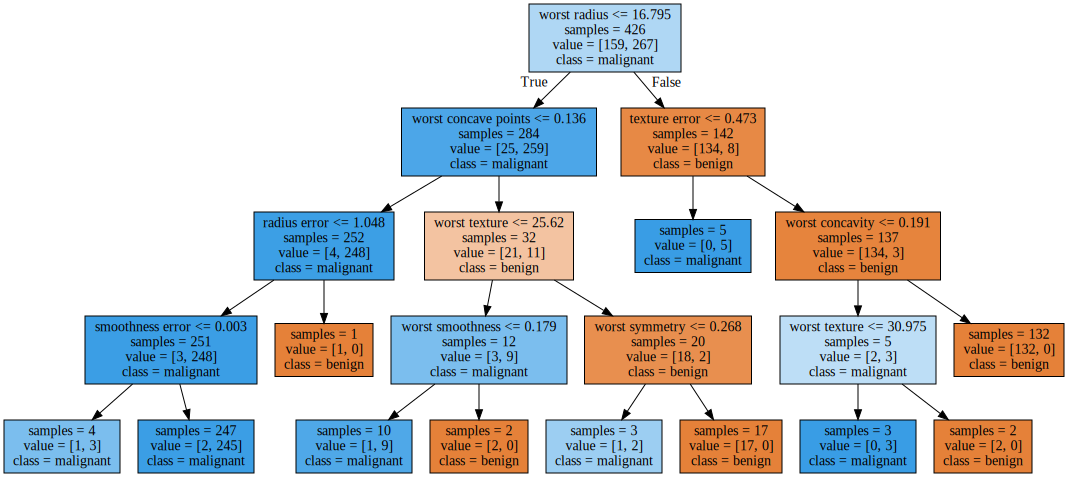

In [201]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

이진 트리이므로 깊이가 1씩 증가하면 그래프 너비는 2배씩 커짐. 트리가 깊어질수록 시각화해도 분석하기 어려움. 각 노드가 가진 정보를 순서대로 나열하면 아래와 같음.

- 조건문
- 노드가 가진 샘플 개수
- [malignant 개수, benign 개수]   
여기서 malignant는 1(positive), benign은 0(negative)
- 클래스

### 트리의 특성 중요도

전체 트리를 모두 살피는 일은 만만치 않으므로 트리의 작동 방식을 요약한 속성들을 참고할 수 있음. 가장 널리 쓰이는 속성인 '특성 중요도(feature importance)'는 트리 생성에 각 특성이 얼마나 중요한지 평가한 값임. 0~1 사이의 숫자로 이루어진 값이며 0은 특성이 전혀 사용되지 않았다는 것을 의미하고, 1은 타깃 클래스를 정확하게 예측했다는 의미임. 특성 중요도의 전체 합은 1임.

In [202]:
print('특성 중요도: ', tree.feature_importances_)

특성 중요도:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


특성 중요도를 시각화함. [barh()](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=cjh226&logNo=221266254398) 함수에 대한 설명은 링크를 클릭해서 참고 바람. 간단하게 말하면 가로로 된 막대 그래프를 그리는 함수임.

30


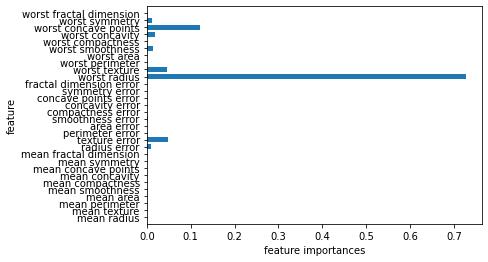

In [203]:
print(cancer.data.shape[1])

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importances')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

첫 번째 노드에서 사용한 특성('worst radius')이 가장 중요한 특성으로 나타나는데, 이 특성이 첫 번째 노드에서 두 클래스를 매우 잘 나누고 있다는 점을 가리킴.

그러나 특성 중요도가 낮은 특성이라고 하여 반드시 유용하지 않다고 할 수 없음. 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 가지고 있기 때문일지 모름.

선형 모델의 계수와 달리 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지 알 수 없음. 다시 말하면 'worst radius'를 중요한 특성이라고 하지만 양성인지 악성인지는 알 수 없음. 특성과 클래스는 단순한 관계가 아닐 수 있다는 의미임. 아래에서 이 점을 확인함.

Feature importances: [0. 1.]


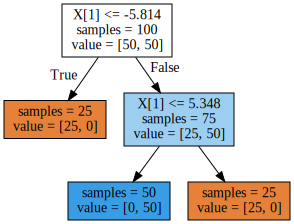

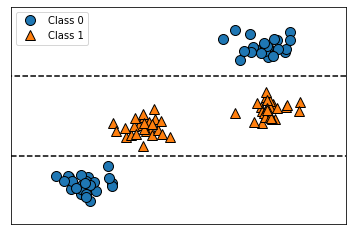

In [204]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

아래 그래프는 y축의 특성이 클래스 레이블과 복합적인 관계를 가지고 있는 2차원 데이터셋과 결정 트리가 만든 결정 경계를 나타냄. 그래프에 표시되지 않았으나 x축은 X[0]이고 y축은 X[1]임.

여하튼 이 그림은 특성 2개와 클래스 2개를 가진 데이터셋으로 만들었음. X[1]에 있는 정보만 사용했고 X[0]은 전혀 사용하지 않음. 그러나 X[1]과 출력 클래스는 비례하거나 반비례하는 관계가 아님. X[1]의 값이 높으면 클래스0이고 낮으면 1이라고 말할 수 없음. 그 반대 값도 마찬가지임. 이는 회귀에 대한 결정 트리도 같은 설명임. 회귀에 대한 결정 트리도 분류에 대한 결정 트리처럼 사용법과 분석이 매우 비슷하기 때문임.

그러나 모든 트리 기반 회귀 모델을 사용할 때 유의할 점은 '외삽(extrapolation')'이라는 속성, 즉 훈련 데이터 범위 밖의 데이터 포인트는 전혀 예측할 수 없음.

컴퓨터 메모리 가격 동향 데이터셋을 사용하여 위 내용을 자세히 살핌. 먼저 데이터를 사용하여 그래프를 그림.

     Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
..          ...      ...           ...
328         328  2015.58  4.500000e-03
329         329  2015.67  4.300000e-03
330         330  2015.75  4.200000e-03
331         331  2015.83  3.800000e-03
332         332  2015.92  3.700000e-03

[333 rows x 3 columns]


Text(0, 0.5, 'price ($/Mbyte)')

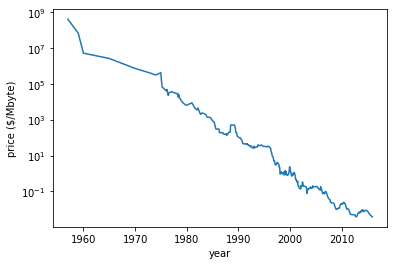

In [205]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))
print(ram_prices)

plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price ($/Mbyte)')

y축을 로그 스케일로 그리면 약간 굴곡이 생기는 점 말고는 선형적으로 나타나서 예측하기가 비교적 쉬움.

날짜 특성만으로 2000년 전까지의 데이터를 사용하여 2000년 후 가격을 예측함. 모델을 훈련하고 예측을 수행한 뒤에 로그 스케일을 원래대로 되돌리기 위해 지수 함수를 사용함. 그래프를 표현하고자 전체 데이터셋에 예측을 수행했지만 테스트 데이터셋과의 비교를 중점으로 둠.

In [206]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전은 훈련 데이터, 2000년 이후는 테스트 데이터로 지정함.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측에 날짜 특성만 사용함.
X_train = data_train.date[:, np.newaxis] # 넘파이 `newaxis` 함수는 배열에 축을 추가(차원을 늘리는)하는 함수임.
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿈.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해 수행함.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌림.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


실제 값과 결정 트리, 선형 회귀의 예측값을 비교하는 그래프를 그림.

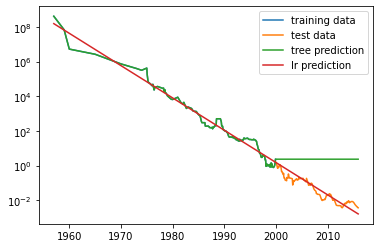

In [207]:
plt.semilogy(data_train.date, data_train.price, label='training data')
plt.semilogy(data_test.date, data_test.price, label='test data')
plt.semilogy(ram_prices.date, price_tree, label='tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='lr prediction')
plt.legend()

선형 모델은 훈련 데이터와 테스트 데이터에 있는 미세한 굴곡을 직선 형태로 근사하여 2000년 이후인 테스트 데이터를 꽤 정확하게 예측함.

트리 모델은 트리 복잡도에 제한을 두지 않았으므로 훈련 데이터를 완벽하게 예측함. 다만 모델이 가진 데이터 범위 밖으로 나가면 마지막 데이터 포인트를 이용해서 예측할 뿐임. 위에서 제시했듯이 트리 모델은 데이터를 벗어난 새로운 데이터를 예측할 능력이 없음. 모든 트리 모델의 단점임. 물론 트리 기반 모델로 좋은 예측을 할 수 있음. 가격이 오르거나 내릴지를 예측하는 것을 예로 들 수 있음.이 예제는 트리 기반 모델이 시계열 데이터에 적합하지 않다는 점과 트리가 어떻게 예측을 만드는지 그 특성을 보여주는 것을 목적으로 함.

### 장단점과 매개변수

사전 가지치기와 관련된 매개변수는 아래와 같음. 이 매개변수 중에 하나만 적절하게 지정해도 과대적합을 방지하는 데 충분함.

- `max_depth`: 최대 깊이를 지정하는 매개변수.

- `max_leaf_nodes`: 리프 노드의 최대 개수를 지정하는 매개변수.

- `min_smaples_leaf`: 리프 노드가 되기 위한 최소한의 샘플 개수를 지정하는 매개변수.

- `min_samples_split`: 노드가 분기할 수 있는 최소 샘플 개수를 지정하는 매개변수.

- `min_impurity_decrease`: 분할로 얻어질 불순도(impurity) 감소 최솟값을 지정하는 매개변수.

결정 트리가 다른 알고리즘보다 나은 점은 2가지로 설명할 수 있음.

- 시각화하기에 용이하여 비전문가를 이해시키기 수월함. 물론 트리 크기가 크지 않아야 함.

- 어떤 데이터 스케일이든 괜찮음. 각 특성이 개별적으로 처리되어 데이터를 분할하는데 데이터 스케일의 영향을 전혀 받지 않으므로 특성의 정규화나 표준화 같은 전처리가 불필요함. 특성의 스케일이 서로 다르거나 이진 특성과 연속적 특성이 섞인 데이터에도 잘 작동함.

단점도 존재함.

- 사전 가지치기를 해도 과대적합이 되는 경향이 있어서 일반화 성능이 좋지 않음. 이 단점 때문에 다음 파트에서 제시하는 앙상블 방법을 대안으로 흔하게 사용함.

## 2.3.6 결정 트리의 앙상블

'앙상블(ensemble)'은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법임. '랜덤 포레스트(random forest)'와 '그레이디언트 부스팅(gradient boosting)'이 매우 효과적인 모델이며 두 모델 모두 기본으로 결정 트리를 사용함.

### 랜덤 포레스트

랜덤 포레스트는 결정 트리의 주요 단점인 훈련 데이터에 대한 과대적합을 방지하는 방법임. 조금씩 다른 여러 결정 트리의 묶음인데, 각 트리는 비교적 에측을 잘할 수 있지만 데이터 일부에 과대적합하는 경향이 있다는 점에 기초하여 만들어짐. 예를 들면 작동은 잘 하지만 서로 다른 방향으로 과대적합 된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합 된 양을 줄일 수 있음. 이런 방식으로 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어듦.

이 방법이 유효하려면 결정 트리를 많이 만들어야 하는데, 각각의 트리는 타깃 예측을 잘하는 것은 기본이고 다른 트리와는 구별되어야 함. 따라서 트리를 생성할 때 각각의 트리들이 완전히 독립적이며 다른 형태를 취하도록 무작위성을 주입함. 방법은 두 가지임.

- 데이터 포인트를 무작위로 선택함.

- 분할 테스트에서 특성을 무작위로 선택함.

#### 랜덤 포레스트 구축

먼저 `RandomForestRegressor`와 `RandomForestClassifier`의 `n_estimators`(기본값은 10이었지만 사이킷런 0.22 버전부터는 지정하지 않았을 때 `100`으로 지정된다는 경고가 출력됨.) 매개변수 값에 생성할 트리의 개수를 정해야 함. 그리고 '부트스트랩 샘플(bootstrap sample)'을 생성함. `n_samples`개의 데이터 포인트 중에서 데이터를 `n_samples` 횟수만큼 반복 추출함(한 샘플이 여러 번 중복 추출될 수 있음). 이 데이터셋은 원래 데이터셋 크기와 동일하지만 어떤 데이터 포인트는 누락될 수도 있고(대략 3/1) 어떤 데이터 포인트는 중복될 수 있음(샘플 100개 중에 어떤 샘플 하나가 선택되지 않을 확률은 $\frac{99}{100}$이고, 뽑은 샘플을 제외하지 않고 100번 반복할 때 한 번도 선택되지 않을 확률은 $(\frac{99}{100})^{100} = 0.366$임).

그다음 이렇게 만든 데이터셋으로 결정 트리를 만듦. 



#### 랜덤 포레스트 분석

two_moon 데이터셋으로 트리 5개로 구성된 랜덤 포레스트 모델을 만듦.

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

랜덤 포레스트 안에 만들어진 트리는 `estimators_` 속성에 저장됨. 각 트리에서 학습된 결정 경계와 이를 취합해 만든 결정 경계를 함께 시각화함. [raval()](https://rfriend.tistory.com/349) 함수에 대한 설명은 클릭하여 참고 바람. 쉽게 말하면 1차원으로 줄이는 함수임.

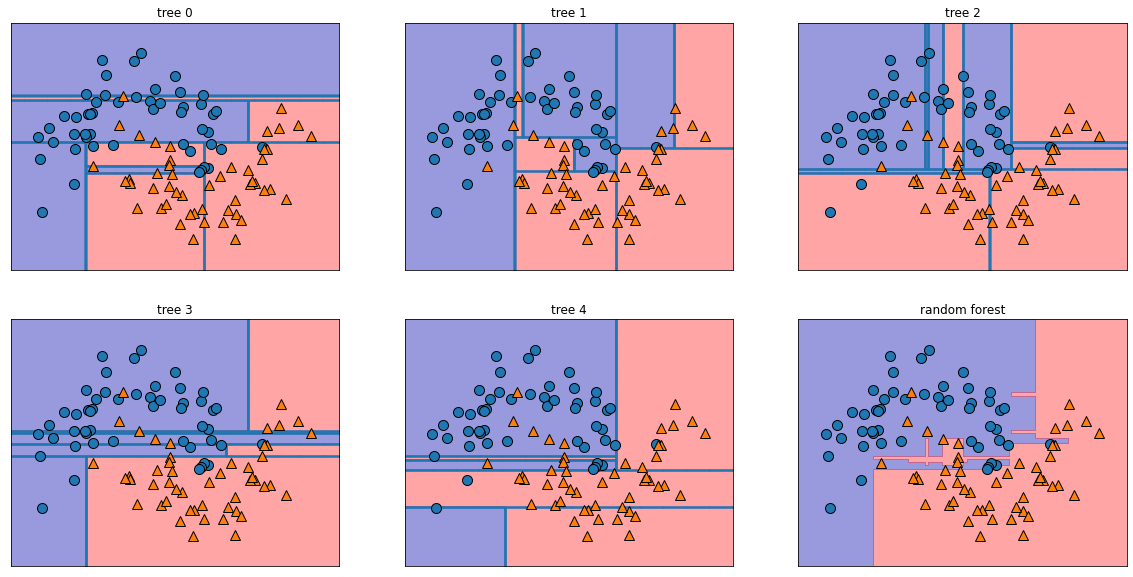

In [209]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('random forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

트리 다섯 개가 만든 결정 경계가 각각 다름. 부트스트랩 샘플링으로 인해 한쪽 트리에 나타나는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있어서 각 트리는 불완전함.

랜덤 포레스트는 개개의 트리보다는 덜 과대적합 되고 훨씬 좋은 경계를 만듦. 실제 애플리케이션에서는 수백 수천개 트리를 사용하므로 더 부드러운 결정 경계가 만들어짐.

유방암 데이터셋에 트리 100개로 이뤄진 랜덤 포레스트를 적용함.

In [210]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(forest.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


매개변수를 튜닝하지 않고도 다른 모델보다 정확도가 높은 건 랜덤 포레스트의 강점임. 물론 `max_features` 매개변수를 조정하거나 사전 가지치기를 시도할 수도 있음.

랜덤 포레스트도 특성 중요도를 제공함. 각 트리의 특성 중요도를 취합해서 계산함. 트리 하나보다 랜덤 포레스트에서 제공하는 특성 중요도가 더 신뢰할 만함.

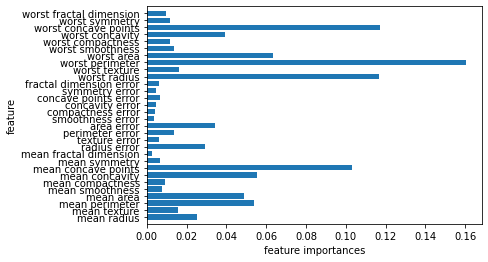

In [211]:
plot_feature_importances_cancer(forest)

위에서 출력한 단일 결정 트리의 특성 중요도보다 0 이상의 중요도 값이 훨씬 많음. 단일 결정 트리처럼 랜덤 포레스트도 'worst radius' 특성의 중요성을 인정하지만 가장 많은 정보를 가진 특성으로 'worst perimeter'를 선택함. 랜덤 포레스트를 만드는 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려하도록 하므로 단일 결정 트리보다 데이터를 더 넓게 볼 수 있음.

#### 장단점과 매개변수

랜덤 포레스트는 성능이 매우 좋고 매개변수 튜닝을 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없으므로 널리 사용되는 알고리즘임. 

단일 결정 트리의 단점을 보완하고 장점은 그대로 취했지만, 의사 결정 과정을 간소하게 표현하려면 단일 결정 트리를 사용할 수 있음. 랜덤 포레스트를 통해 생성된 수많은 트리는 단일 결정 트리에 비해 자세하게 분석하기 어렵고 더 많은 특성을 사용하므로 트리 깊이가 더 깊어지기 때문임.

데이터셋이 크면 랜덤 포레스트로 모델을 만들 때 시간이 오래 걸리지만 CPU 코어가 많이 확보된 환경이라면 병렬 처리해서 시간을 단축할 수 있음. `n_jobs` 매개변수(기본값 `1`)는 사용할 코어 수를 지정할 수 있는데 수를 늘릴수록 속도가 빠름. 코어 2개를 사용하면 처리 속도가 2배가 됨. 값을 -1로 지정하면 확보된 모든 코어를 사용함.

`random_state` 값에 따라 전혀 다른 모델이 만들어짐. 물론 트리 수가 많을수록 변화가 적지만 같은 결과를 원한다면 무조건 같은 값을 지정해야 함.

텍스트 데이터처럼 고차원적이고 희소한 데이터에는 적합하지 않음. 이런 데이터에는 선형모델이 적합함. 랜덤 포레스트는 선형 모델보다 많은 메모리를 사용하며 훈련 속도와 예측 속도가 느림. 속도와 메모리 사용에 제약이 있는 애플리케이션은 선형 모델이 적합함.

`max_depth`, `max_leaf_nodes`, `min_samples_leaf`, `min_samples_split` 매개변수로 사전 가지치기를 시도할 수 있음(단일 결정 트리와 동일함).

`n_estimator` 매개변수 값은 클수록 더 많은 트리를 평균하게 되어 과대적합을 줄이면서 더욱 안정된 모델을 만듦. 다만 더 많은 훈련 시간과 메모리가 필요하므로 환경에 적당한 수준을 지정해야 함.

`max_features` 매개변수는 각 트리를 얼마나 무작위로 생성할지를 결정하며 값이 작을수록 과대적합을 줄이며 기본값을 쓰는 것을 추천함. 분류의 경우 `max_features=sqrt(n_features)`이고, 회귀의 경우 `max_features=n_features`인데 이 두 값 모두 기본값이고 `auto`로 표시되어 있음. `max_features`나 `max_leaf_nodes` 매개변수를 추가하면 가끔 성능이 향상되기도 하고 메모리와 처리 시간을 줄일 수도 있음. 



### 그레이디언트 부스팅 회귀 트리

그레이디언트 부스팅 회귀 트리는 결정 트리 여러 개를 묶어서 강력한 모델을 만드는 앙상블 모델임. 이름에 회귀가 있지만 회귀와 분류 모두에 사용할 수 있음(`GradientBoostingClassifier`와 `GradientBoostingRegressor` 모두 `DecisionTreeRegressor`에 기반하여 알고리즘을 구현함). 그레이디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성함. 즉 무작위성이 없지만 강력한 사전 가지치기를 시전함. 보통 1~5개만큼 깊지 않은 트리를 사용하므로 필요한 메모리가 적고 속도도 빠름. 얕은 트리 같은 간단한 모델(약한 학습기(weak learner))을 많이 연결하는 메커니즘임. 각각의 트리는 데이터 일부에만 예측을 잘 수행하므로 많은 트리를 추가할수록 성능이 좋아짐. 다시 말하면 이전에 생성한 트리의 예측과 타깃값 사이의 오차를 줄이면서 새로운 트리를 추가함. 손실 함수를 정의하고 '경사 하강법(gradient descent)'을 사용해서 추가될 트리가 예측할 값을 보정해감.

업계에서 널리 사용하고 대회에서도 강력한 모델 중 하나임. 랜덤 포레스트보다는 매개변수 지정에 민감한 편이지만 적절하게 조정하면 더 좋은 정확도를 보여줌.

`learning_rate`는 이전 트리의 오차를 얼마나 강하게 보정할 것인지 학습률을 지정하는 매개변수임. 학습률이 클수록 보정을 강하게 하므로 더 복잡한 모델을 생성함.

`n_estimators` 매개변수에 높은 값을 지정하면 앙상블에 더 많은 트리를 추가하여 모델 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 많아짐.


유방암 데이터셋을 사용해서 `GradientBoostingClassifier` 클래스를 적용함. 기본값인 깊이(`max_depth`)가 3인 트리 100개, 학습률(`learning_rate`) 0.1을 적용함.

In [212]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


훈련 세트 정확도가 100%인 것은 과대적합을 의미하므로 사전 가지치기를 통해 트리의 최대 깊이를 줄이거나 학습률을 낮추면 됨.

In [213]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


두 방식을 사용하여 모델 복잡도를 감소시키면서 훈련 세트 정확도를 낮췄고, 트리 깊이를 제한하면서 테스트 세트 정확도가 향상됨.

특성 중요도를 시각화함.

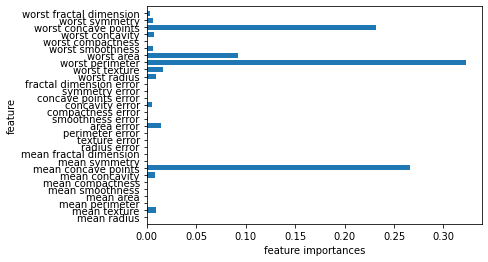

In [214]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

랜덤 포레스트와 비슷한 특성을 강조하지만 그레이디언트 부스팅은 일부 특성을 완전하게 무시하는 경향을 보임.

보통 더 안정적인 랜덤 포레스트를 추구하지만 예측 시간이 중요하거나 마지막 성능까지 내야 하는 상황에서는 그레이디언트 부스팅을 사용하면 도움이 될 수 있음.

대규모 머신러닝 문제에 그레이디언트 부스팅을 적용하려면 `xgboost`(https://xgboost.readthedocs.io/) 패키지와 파이썬 인터페이스를 검토하는 것을 권장함. 그레이디언트 부스팅을 구현하는 것보다 빠르고 튜닝하기도 쉬움. 참고로 `xgboost`는 널리 쓰이는 매우 강력한 모델임.

#### 장단점과 매개변수

그레이디언트 부스팅 결정 트리는 지도 학습에서 매우 강력하고 널리 사용하는 모델 중 하나임. 다른 트리 기반 모델처럼 특성 스케일을 조정하지 않아도 되고, 이진 특성이나 연속적 특성에서도 잘 동작함. 

다만 매개변수를 적절하게 조정해야 하고, 훈련 시간이 길며, 희소한 고차원 데이터에는 잘 작동하지 않는다는 단점이 있음.

중요한 매개변수는 아래 두 가지가 있음.

- `n_estimators`는 트리 개수를 지정하는 매개변수임. 이 매개변수의 값이 크면 모델이 복잡해지고 과대적합 될 가능성이 높아짐.

- `learning_rate`는 이전 트리의 오차 보정의 정도를 조절하는 매개변수임. 이 매개변수의 값을 낮추면 비슷한 복잡도를 가진 모델을 만들기 위해 더 많은 트리를 추가해야 함. 

- 일반적으로는 가용 시간과 메모리 한도를 토대로 `n_estimators`를 조정한 후에 적절한 `learning_rate`를 찾음. 훈련 데이터에서 `validation_fraction`(기본값 `0.1`) 비율만큼 검증 데이터로 사용하여 `n_iter_no_change`(기본값 `None`)에 지정한 반복 값만큼 검증 점수가 향상되지 않으면 훈련을 종료함. 기본값 `None`이면 조기 종료를 사용하지 않음.

또 다른 중요한 매개변수는 아래 두 가지가 있음.

- `max_depth`는 트리 깊이를 지정하는 매개변수임. 일반적으로 값을 매우 작게 지정하여 트리 깊이를 5보다 깊어지지 않도록 함.

- `max_leaf_nodes`는 리프 노드에 있어야 할 최소 샘플 수를 지정하는 매개변수임.



## 2.3.7 배깅, 엑스트라 트리, 에이다부스트

two_moons 데이터셋과 cancer 데이터셋을 사용하여 또 다른 앙상블 알고리즘인 '배깅', '엑스트라 트리', '에이다부스트'를 설명함. 모듈을 임포트하고 예제 데이터셋을 만듦.

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

### 배깅

'배깅(Bagging)'은 'Bootstrap aggregating'의 줄임말임. 중복을 허용한 랜덤 샘플링으로 생성한 훈련 세트로 분류기를 각각 다르게 학습시킴. 부트스트랩 샘플을 만드는 방식은 랜덤 포레스트의 특징과 같음. 분류기가 `predict_proba()` 메서드를 지원하면 확률값을 평균해서 예측을 수행하고, 지원하지 않는 분류기를 사용하면 빈도가 높은 클래스 레이블을 예측 결과로 출력함.

배깅을 사용하여 cancer 데이터셋에 로지스틱 회귀 모델을 100개만큼 훈련하여 앙상블을 함.

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators=100,
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=42, ver

`LogisticRegression` 객체를 기반이 되는 분류기로 전달하고 훈련할 분류기 개수는 100개로 지정함. `oob_score=True`(OOB, out of bag, 기본값은 `False`)는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가함. 이 값으로 테스트 세트의 성능을 짐작함. 물론 `RandomForestClassifier`도 이 매개변수를 지원함.

In [217]:
print('훈련 세트 정확도: {:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB 샘플 정확도: {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도: 0.958
테스트 세트 정확도: 0.958
OOB 샘플 정확도: 0.944


훈련 세트 정확도가 본서의 정확도와 다르게 출력되어 과소적합을 보여줌. 개념을 살피는 데에 중점을 두고 다음 설명으로 넘어감.

결정 트리로 배깅 하는 것보다 랜덤 포레스트를 사용하는 것이 편리함. 다만 개념 설명이 목적이므로 결정 트리에 배깅을 적용함.

In [218]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5,
                            n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


위 배깅 분류기에 있는 결정 트리의 결정 경계를 시각화함.

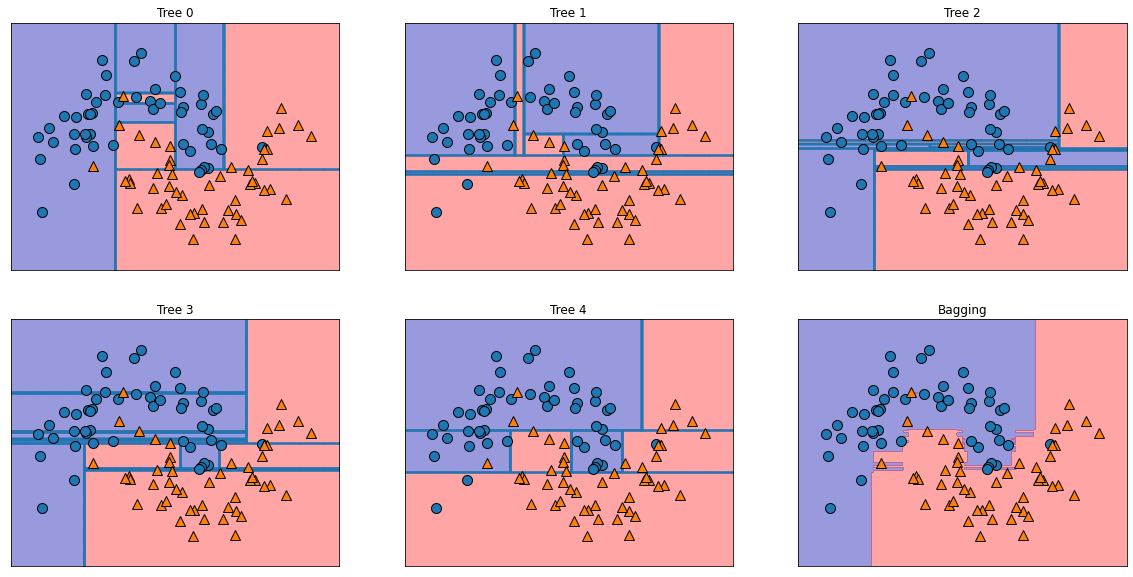

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1952926171, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1761383086, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None

In [219]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Bagging')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

print(axes.ravel())
print(bagging.estimators_)

랜덤 포레스트가 나타내는 결정 경계와 매우 유사함.

`n_estimatores=100`으로 지정하여 cancer 데이터셋에 훈련시키고 훈련 세트와 테스트 세트의 성능을 확인함.

In [220]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print('훈련 세트 정확도: {:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB 샘플 정확도: {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플 정확도: 0.951


랜덤 포레스트와 다르게 배깅은 `max_samples` 매개변수에 부트스트랩 샘플 크기를 지정함. 참고로 랜덤 포레스트는 `RandomForestClassifier(splitter='best')`로 고정됨. `splitter='random'`으로 지정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾음. 이런 결정 트리의 배깅은 아래에서 다루는 '엑스트라 트리'와 관련성이 있음.

### 엑스트라 트리

'엑스트라 트리(Extra-Trees)'는 랜덤 포레스트와 유사하지만 후보 특성을 무작위로 분할해서 최적의 분할을 찾음. 아울러 랜덤 포레스트와 달리 `DecisionTreeClassifier(splitter='random')`을 사용하고 부트스트랩 샘플링은 적용하지 않음. 무작위성을 증가시키면 모델의 편향이 늘지만 분산은 감소함. 즉 랜덤 포레스트와 엑스트라 트리는 다른 방식으로 무작위성을 모델에 적용하는 것임. 예측 방식은 랜덤 포레스트와 동일하게 각 트리가 만든 확률값을 평균함.

two_moons 데이터셋에 엑스트라 트리를 적용해서 결정 경계를 확인함. 후보 노드를 랜덤하게 분할해서 최선의 분할을 찾음.

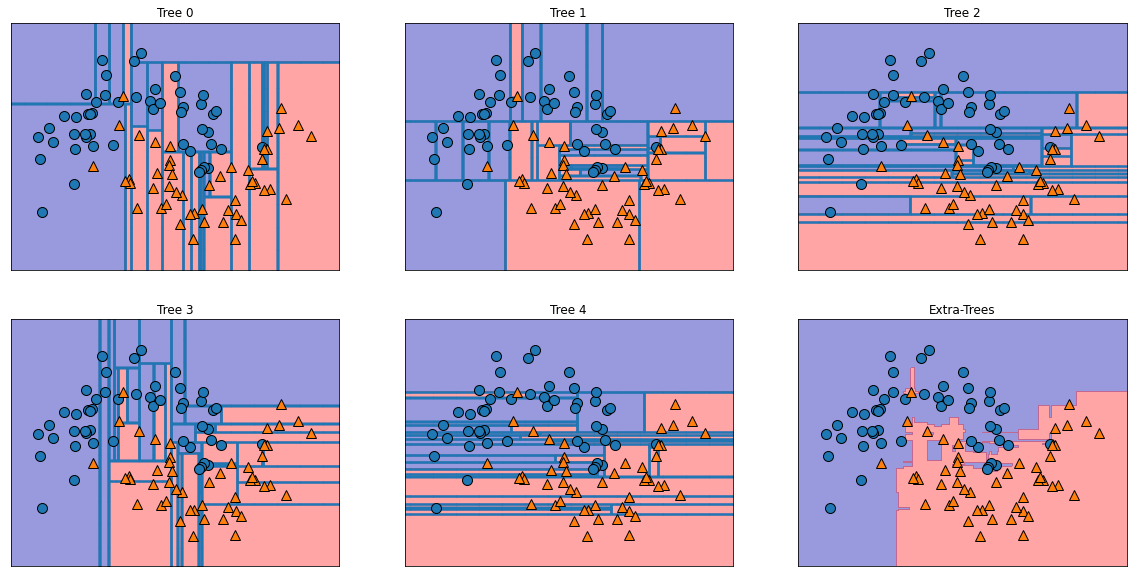

In [221]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Extra-Trees')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

각 트리의 결정 경계가 더 복잡해졌지만 비교적 안정적인 형태를 취함.

트리 개수를 100으로 지정해서 cancer 데이터셋을 적용함.

In [222]:
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print('훈련 세트 정확도: {:.3f}'.format(xtree.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(xtree.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


엑스트라 트리는 랜덤 포레스트와 거의 같은 성능을 냄. 엑스트라 트리가 랜덤 포레스트보다 계산 비용이 적지만 일반화 성능을 높이기 위해 많은 트리를 생성해야 함. 무작위 분할 때문임. 따라서 일반적으로 랜덤 포레스트가 더 선호됨.

엑스트라 트리의 특성 중요도를 시각화함. 

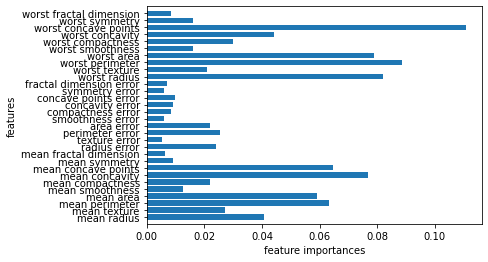

In [223]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importances')
plt.ylabel('features')
plt.ylim(-1, n_features)
plt.show()

랜덤 포레스트와 유사함.

### 에이다부스트

'에이다부스트(AdaBoost, Adaptive Boosting)'는 그레이디언트 부스팅처럼 약한 학습기를 사용하지만, 그레이디언트 부스팅과의 차이점은 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킴. 훈련된 각 모델은 성능에 따라 가중치가 부여되고, 예측을 만들 때 모델이 예측한 레이블을 기준으로 가중치를 합산해서 가장 높은 값을 지닌 레이블을 고름.

`AdaBoostClassifier`는 기본값으로 `DecisionTreeClassifier(max_depth=1)`를 사용하고, `AdaBoostRegressor`는 기본값으로 `DecisionTreeRegressor(max_depth=3)`를 사용함. `base_estimator` 매개변수에 다른 모델을 지정할 수 있음. 그레이디언트 부스팅처럼 순차 학습 방법을 취하므로 `n_jobs` 매개변수를 지원하지 않음.

기본값을 사용하여 two_moons 데이터셋과 cancer 데이터셋에 적용함. 먼저 two_moons 데이터셋에 적용해서 결정 경계를 그림.

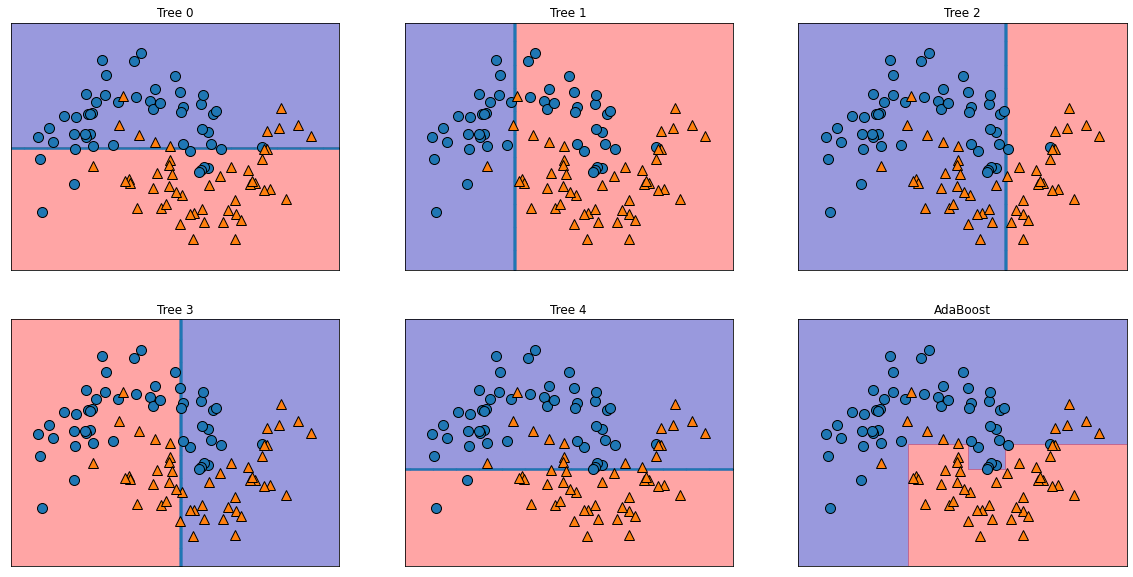

In [224]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('AdaBoost')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

`AdaBoostClassifier`는 깊이가 1인 결정 트리를 사용하므로 각 트리의 결정 경계가 직선 하나로 나타남. 앙상블 된 결정 경계 또한 다른 앙상블 모델에 비해 단순함.

cancer 데이터셋에 적용함.

In [225]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print('훈련 세트 정확도: {:.3f}'.format(ada.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(ada.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.986


매우 얕은 트리를 앙상블 했기 때문에 일반화 성능을 약간 향상시킴.

특성 중요도를 확인함.

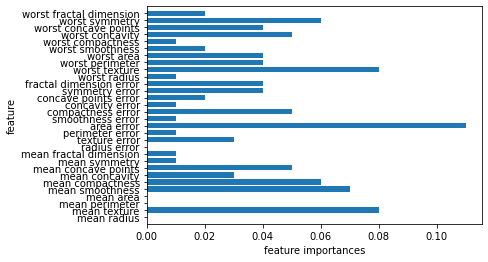

In [226]:
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()

다른 모델과는 달리 'area error' 특성이 높게 강조된 것을 볼 수 있음.

## 2.3.8 커널 서포트 벡터 머신

'커널 서포트 벡터 머신(SVM, kernelized support vector machine)'은 입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들도록 확장한 것임. 분류와 회귀 모두에 사용할 수 있지만 책에서는 `SVC`를 사용하는 분류 문제만 다룸. `SVR`을 사용하는 회귀 문제에도 같은 개념을 적용함. 여하튼 알고리즘 이면에 존재하는 아이디어 정도만 살핌.

### 선형 모델과 비선형 특성

위에서 제시한 [그림 2-15]에서 보았듯이 직선과 초평면은 유연하지 못해서 저차원 데이터셋에서는 선형 모델이 매우 제한적임. 특성을 제곱하거나 특성끼리 곱하는 방법으로 새로운 특성을 추가해서 선형 모델을 유연하게 만들 수 있음.

2.3.5 결정 트리의 트리의 특성 중요도 파트에서 사용한 인위적 데이터셋을 다시 살펴봄. 선형으로 구분되지 않는 클래스를 가진 이진 분류 데이터셋 그래프를 그림.

Text(0, 0.5, 'feature 1')

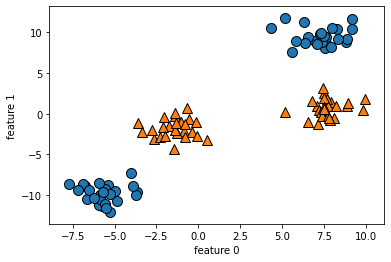

In [227]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 2')

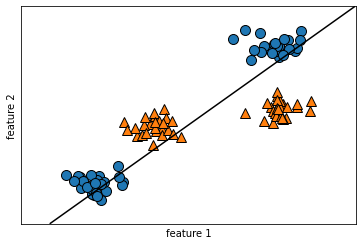

In [228]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

선형 SVM으로 만든 결정 경계임. 분류를 위한 선형 모델은 직선만으로 샘플을 나누므로 적합하지 않음.

두 번째 특성을 제곱한 특성1$^2$를 새로운 특성으로 추가해서 특성을 확장함. 특성0, 특성1, 특성1$^2$이라는 특성 3개로 이루어진 3차원 데이터 포인트로 표현됨. 이를 3차원 산점도로 그림.

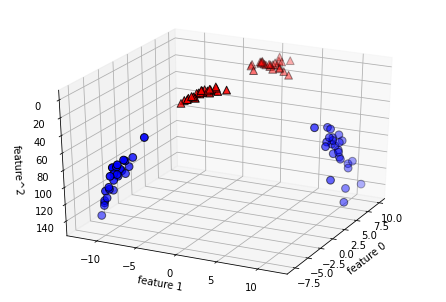

In [229]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

# 두 번째 특성을 제곱하여 새로운 특성 하나를 생성함.
X_new = np.hstack([X, X[:, 1:] ** 2])

figure = plt.figure()
# 3차원 그래프를 생성함.
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0인 포인트를 먼저 그린 다음에 y == 1인 포인트를 그림.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
# 물결 표시(~)는 True를 False로, False라면 True로 바꾸는 원리를 가짐. 반대로 바꾸는 것임.
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
           marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature^2')
plt.show()

확장된 데이터셋으로 선형 모델을 만듦. 코드 해석이 잘 안 되거나 수식이 잘 이해되지 않으면 일단 넘어가도 됨. 아래 출력된 그래프를 제시하는 데 의의를 둠.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


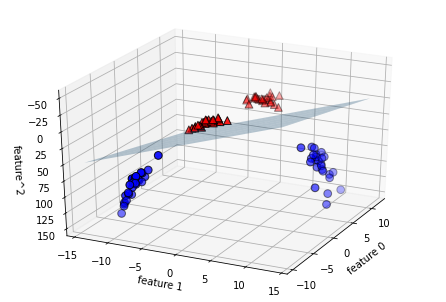

In [230]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계를 그림.
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
           marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature^2')
plt.show()

이를 원래 특성으로 투영하면 선형이 아니라는 점을 알 수 있음. 타원에 가까움.

Text(0, 0.5, 'feature 1')

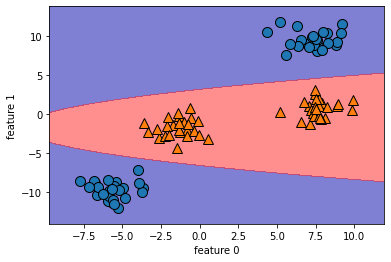

In [231]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

### 커널 기법

앞에서는 비선형 특성을 추가해서 선형 모델을 강력하게 만들었으나, 실전에서는 어떤 특성을 추가해야 할지 모르고 특성을 많이 추가하면 연산 비용이 커짐. 이런 문제를 해결하기 위해 '커널 기법(kernel trick)'을 사용함. 수학적 기교라고 할 수 있는데, 새로운 특성을 많이 생성하지 않아도 고차원에서 분류기를 학습시킬 수 있음. 실제로 데이터를 확장하지 않고 확장된 특성에 대한 샘플(앞으로는 데이터 포인트 대신 샘플을 사용함)들의 거리(스칼라 곱)를 계산함.

서포트 벡터 머신으로 데이터를 고차원 공간에 매핑 하는 데 많이 사용하는 방법은 아래 두 가지가 있음. 무슨 말인지 이해하기 어려우면 일단 넘어가도 됨. 아래에서 계속 설명함.

- 다항식 커널: 본래 존재하는 특성의 가능한 조합을 지정된 차수까지 모두 계산함(예를 들면 특성1$^2 \times $특성2$^5$).

- 가우시안(Gaussian) 커널(RBF, radial basis function): 지수 함수의 테일러 전개를 이용하여 차원이 무한한 특성 공간(다항식 차원)에 매핑함. 다시 말하면 모든 차수의 모든 다항식을 고려함. 고차항이 될수록 특성 중요도가 줄어드는데, 그 이유는 지수 함수의 테일러 급수 전개 때문임.

### SVM 이해하기

SVM은 각 훈련 샘플이 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지 학습하게 됨. 일반적으로는 훈련 데이터의 일부(두 클래스 사이의 경계에 위치한 일부 샘플)만 결정 경계를 만드는 데 영향을 미침. 이런 데이터를 '서포트 벡터(support vector)'라고 부르며 이 명칭에서 서포트 벡터 머신으로 명명된 것임.

새로운 샘플에 대해 예측하기 위해 각 서포트 벡터와의 거리를 측정함. 분류 결정은 서포트 벡터까지의 거리에 기반하며, 서포트 벡터의 중요도는 훈련 과정에서 학습하고 `SVC` 객체의 `dual_coef_` 속성에 저장됨.

샘플 사이의 거리는 가우시안 커널에 의해 계산됨. 아래는 공식임.

$k_{rbf}(x_1, x_2)$ = exp$(-\gamma \lVert x_1 - x_2 \rVert^2)$

$x_1$과 $x_2$는 샘플, $\lVert x_1 - x_2 \rVert$는 유클리디안 거리, $\gamma$(감마, gamma)는 가우시안 커널의 폭을 제어하는 매개변수임.

두 개의 클래스를 가진 2차원 데이터셋인 forge 데이터셋에 SVM을 학습시킨 결과를 나타내는 그래프를 그림. 결정 경계는 검은 실선, 서포트 벡터는 굵은 테두리로 그림. [RBF 커널](https://ichi.pro/ko/bangsahyeong-gijeo-hamsu-rbf-keoneol-idong-keoneol-190150318258570)을 사용한 SVM으로 만든 결정 경계와 서포트 벡터를 나타냄.

Text(0, 0.5, 'feature 1')

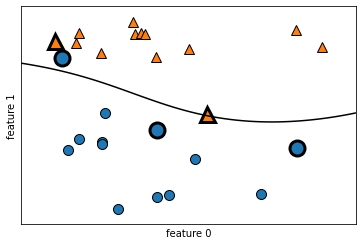

In [232]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
# 'RBF 커널'을 사용함.
# `C` 매개변수와 `gamma` 매개변수는 다음 파트에서 설명함.
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 샘플을 그림.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터를 지정함.
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨.
sv_labels = svm.dual_coef_.ravel() > 0 
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

SVM은 매우 부드럽고 비선형인 경계를 만듦. 

### SVM 매개변수 튜닝

`gamma` 매개변수는 앞 절의 공식에 나와 있는 \gamma로 가우시안 커널 폭의 역수이며, 훈련 샘플 하나가 미치는 영향의 범위를 결정함. 작은 값은 넓은 영역을 뜻하고, 큰 값이라면 영향을 미치는 범위가 제한적임. 다시 말하면 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐(`gamma` > 0 조건을 충족해야 하므로 가우시안 커널 함수 값의 범위는 $e^0$~$e^{-\infty}$, 즉 1 ~ 0사이임. 따라서 `gamma` 값이 작을수록 샘플의 영향 범위가 커짐).

`C` 매개변수는 선형 모델에서 사용한 매개변수와 비슷한 규제 매개변수임. 이 매개변수는 각 포인트의 중요도(`dual_coef_`값)를 제한함.

매개변수를 조정한 결과를 그림.

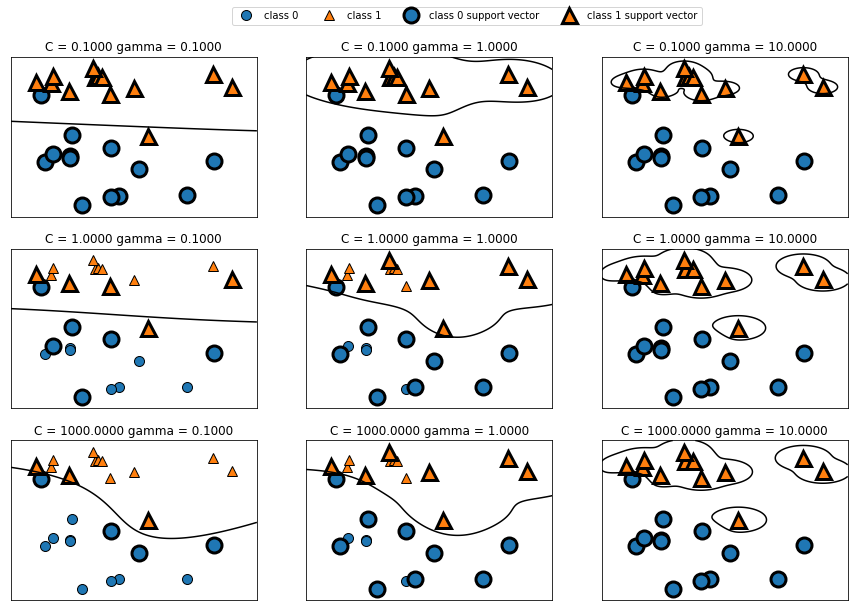

In [233]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(['class 0', 'class 1', 'class 0 support vector',
                   'class 1 support vector'], ncol=4, loc=(.9, 1.2))
plt.show()

왼쪽에서 오른쪽으로 가면서 `gamma` 매개변수를 0.1 -> 10으로 증가시킴. 작은 `gamma` 값은 가우시안 커널의 반경을 크게 해서 많은 샘플들이 가까이 위치함. 왼쪽은 결정 경계가 매우 부드럽고, 오른쪽은 결정 경계가 샘플 하나마다 더 민감해짐. 작은 `gamma` 값이 결정 경계를 천천히 바뀌게 하므로 모델 복잡도를 낮추고, 큰 `gamma` 값은 더 복잡한 모델을 만듦.

위에서 아래로 가면서 `C` 매개변수를 0.1 -> 1000으로 증가시킴. 선형 모델에서처럼 작은 `C`는 제약이 큰 모델을 생성하고 각 샘플이 가진 영향력이 작음. 왼쪽 위는 결정 경계가 거의 선형에 가깝고 잘못 분류된 샘플이 경계에 주는 영향이 거의 없음. 왼쪽 아래는 `C`를 증가시키면 샘플들이 모델에 큰 영향을 주고 결정 경계를 곡선으로 만들면서 분류를 정확하게 함.

RBF 커널 SVM(기본값 `C=1`, `gamma='scale'`)을 유방암 데이터셋에 적용함. `'scale'`은 1/(X_train.shape[1]*X_train.std())이며, 스케일이 조정되지 않은 특성에서 더 좋은 결과를 만듦. 참고로 SVM을 적용하기 전에 특성을 표준화 전처리 하면 `gamma` 매개변수의 값인 `'scale'`과 `auto`(이전 버전 사이킷런에서의 기본값)는 차이가 없음.

In [234]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print('훈련 세트 정확도: {:.2f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도: {:.2f}'.format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


SVM은 잘 작동하는 편이지만 매개변수 설정과 데이터 스케일에 민감함. 특히 입력 특성 범위가 비슷해야 함.

각 특성의 최솟값과 최댓값을 로그 스케일로 나타냄.

Text(0, 0.5, 'feature size')

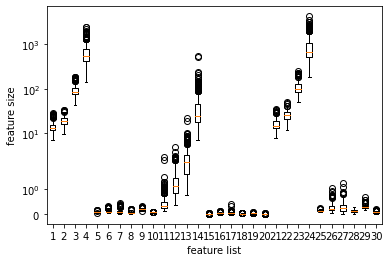

In [235]:
plt.boxplot(X_train)
plt.yscale('symlog')
plt.xlabel('feature list')
plt.ylabel('feature size')

그래프를 살펴보면 유방암 데이터셋의 특성은 자릿수가 상이해서 일부 모델(선형 모델 등)에서도 어느 정도 문제가 될 수 있지만, 커널 SVM에서는 영향이 아주 큼. 아래 파트에서 이 문제를 해결하는 방법을 설명함.

### SVM을 위한 데이터 전처리

위 문제에서 지적했듯이 특성의 자릿수가 상이할 경우에는 특성 값의 범위가 비슷해지도록 데이터를 전처리 해야 함. SVM에서는 모든 특성 값을 평균이 0이고 단위 분산이 되도록 하거나 0~1 사이로 맞추는 방법을 많이 사용함. 3장에서 자세하게 다룰 예정임. 여러 전처리 방법 중에 어떤 방법이 적합한지는 데이터셋이 가진 성질에 따라 다름.

책에서 제시한 코드로 직접 변환을 시도함. 아래 코드에서 사용한 식인 $\frac{X-min(X)}{max(X)-min(X)}$에서 최대와 최소간의 차이가 분모가 되므로 결과는 항상 0~1 사잇값이 됨. 데이터셋에 따라 `StandardScaler` 클래스도 사용할 수 있으나 이 내용은 3장에서 상세하게 다룸.

In [236]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0, 최댓값은 1임.
X_train_scaled = (X_train - min_on_training) / range_on_training
print('특성별 최솟값\n', X_train_scaled.min(axis=0))
print('특성별 최댓값\n', X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


데이터의 스케일을 조정하여 정확도 점수를 확인함.

In [237]:
# 테스트 세트에도 같은 작업을 적용함. 다만 훈련 세트에서 계산한 최솟값과 범위를 사용함.
# 3장에서 자세하게 설명할 예정임.
X_test_scaled = (X_test - min_on_training / range_on_training)

svc = SVC()
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.371


In [238]:
svc = SVC(C=0.01)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.643
테스트 세트 정확도: 0.629


In [239]:
svc = SVC(C=0.1)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.371


In [240]:
svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.371


In [241]:
svc = SVC(C=100)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.629


In [242]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.629


데이터 스케일마다 다른 결과를 나타냄. 물론 사이킷런 버전이 업데이트 되면서 함수 특성이 변경되어 책의 출력값과 다르게 출력됨. 여하튼 매개변수(하이퍼파라미터)를 조정하여 다른 점수를 얻을 수 있다고 정리하고 파트를 마무리함.

### 장단점과 매개변수

SVM은 다양한 데이터셋에서 잘 작동하고 데이터 특성의 수가 적더라도 복잡한 결정 경계를 생성할 수 있음. 저차원과 고차원의 데이터(특성이 적고 많은 것을 다르게 의미하는 표현)에 모두 잘 작동하지만, 샘플 수가 많을 경우엔 적합하지 않음. 예를 들면 샘플 10,000개의 경우엔 잘 작동하고, 샘플 100,000개 이상의 경우엔 속도와 메모리 관점에서 수월하지 않은 경향이 있음.

다른 단점을 제시하자면, 데이터 전처링와 매개변수 설정에 많은 노력을 기울여야 한다는 점임. 따라서 SVM보다는 랜덤 포레스트나 그레이디언트 부스팅처럼 전처리 과정이 거의 필요 없거나 전혀 필요 없는 트리 기반 모델을 많이 사용함.

아울러 SVM은 분석하기가 어렵고, 어떻게 예측이 이루어지는지 이해하기 난해하며, 비전문가에게 모델에 대해 설명하기 또한 난해함.

다만 모든 특성이 비슷한 단위(픽셀의 컬러 강도가 모든 값을 이루는 데이터셋의 형태)이면서 스케일이 비슷하면 SVM을 시도할 만함.

커널 SVM에서 중요한 매개변수는 `C` 매개변수와 `gamma` 매개변수임. 먼저 `C` 매개변수는 커널 종류에 따른 규제의 정도를 숫자값으로 조정함. `C`와 `gamma` 모두 모델의 복잡도를 조정하고 둘 다 큰 값이 더 복잡한 모델을 생성함. 따라서 이 두 매개변수는 연관성이 크므로 함께 조정하면서 최적값을 찾아야 함.

위에서 살핀 'RBF' 커널은 `kenel` 매개변수의 기본값으로 설정된 `kbf`이며, 가우시안 커널 폭의 역수인 `gamma` 매개변수 하나를 가짐.

참고로 `kernel` 매개변수는 아래 5가지 값을 가짐.

- `rbf`

- `linear`: $(x_1 \cdot x_2)$

- `poly`: $(\gamma(x_1 \cdot x_2)+c)^{d}$

- `sigmoid`: $(tanh(\gamma(x_1 \cdot x_2)+c))$

- `precomputed`

가우시안 커널의 공식 exp$(\frac{-\parallel x_1-x_2 \parallel^2}{2\sigma^2})$을 exp$(-\gamma \parallel x_1-x_2 \parallel^2)$로 간단하게 표현함.   
여기에서 $\gamma=\frac{1}{2\sigma^2}$인 $\sigma$가 종종 가우시안 커널의 폭을 조절한다고 함.

## 2.3.9 신경망(딥러닝)

추후에 정리할 예정임.

### 신경망 모델

### 신경망 튜닝

### 장단점과 매개변수

### 신경망의 복잡도 추정

# 2.4 분류 예측의 불확실성 추정

사이킷런에서 많이 사용하는 인터페이스 중에 하나는 분류기에 예측의 불확실성을 추정할 수 있는 기능임. 어떤 테스트 샘플에 대해 분류기가 예측한 클래스뿐만 아니라 클래스가 얼마나 정확한지를 아는 것이 중요함. 실제 애플리케이션에서는 오류의 종류에 따라 전혀 다른 결과를 도출함.

암을 진단하는 의료 애플리케이션을 예로 들면, 거짓 양성(false positive)으로 예측하면 환자에게 추가로 진료 받으라는 권고를 하겠지만 거짓 음성(false negative)는 제때 질병을 치료하지 못해서 심각한 결과를 초래할 수 있음. 6장에서 이 주제를 자세하게 다룰 예정임.

여하튼 사이킷런 분류기에서 불확실성을 추정할 수 있는 함수는 `decision_function`과 `predict_proba`가 있음. 전체는 아니지만 분류 클래스 대부분은 적어도 둘 중 하나를 제공하고, 두 함수 모두를 제공하는 경우도 많음.

인위적으로 생성한 2차원 데이터셋을 사용해서 `GradientBoostingClassifier` 분류기의 `decision_function`과 `predict_proba` 메서드의 역할을 설명함.

In [243]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

# `make_circles` 함수의 매개변수가 가진 기능은
# 해당 함수 위에 마우스를 올리면 함수에 대한 설명과 함께 설명되어 있음.
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스 이름을 0(음성 클래스)은 "blue"로, 1(양성 클래스)은 "red"로 변경함.
# 리스트와 리스트를 이어서 연결하면 해당하는 순서의 값을 출력함.
y_named = np.array(['blue', 'red'])[y]
print(y)
print(y_named)

# 배열 여러 개를 `train_test_split` 함수에 한꺼번에 넣을 수 있음.
# 훈련 세트와 테스트 세트로 나뉘는 방식은 같음.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(
    X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0]
['red' 'red' 'blue' 'red' 'red' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'blue' 'red' 'red' 'red' 'blue' 'blue' 'blue' 'red' 'blue' 'blue' 'red'
 'red' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red'
 'red' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'blue' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'blue' 'blue' 'red'
 'blue' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'red' 'blue' 'blue' 'red'
 'blue' 'red' 'blue' 'red' 'red' 'blue' 'red' 'red' 'blue' 'red' 'blue'
 'red' 'red' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'red' 'blue' 'blue'
 'red' 'red' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'blue' 'red' 'blue'
 'blue']


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## 2.4.1 결정 함수

이진 분류에서 `decision_function` 메서드의 반환값 크기는`(n_samples,)` 형태이며 각 샘플이 하나의 실숫값을 반환함.

In [244]:
print('X_test.shape:', X_test.shape)
print('결정 함수 결과 형태:', gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


이 값은 모델이 샘플이 클래스1(양성 클래스)에 속한다고 믿는 정도를 나타냄. 양숫값은 양성 클래스를 의미하고, 음숫값은 음성 클래스를 의미함. 아래에서 결정 함수 결과 중에 첫 번째부터 6개만 확인함.

In [245]:
print('결정 함수:\n', gbrt.decision_function(X_test)[:6])

결정 함수:
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


결정 함수 부호만 보고 예측 결과를 알 수 있음.

In [246]:
print('임계치와 결정 함수 결과 비교:\n', gbrt.decision_function(X_test) > 0)
print()
print('예측:\n', gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]

예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


이진 분류에서 `classes_` 속성의 첫 번째 원소는 음성 클래스, 두 번째 원소는 양성 클래스임. `predict` 함수를 재현하려면 `classes_` 속성을 사용해야 함.

In [247]:
# 불리언 값을 0과 1로 변환함.
# `astype(int)` 함수를 사용하여 False는 0, True는 1로 치환함.
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
print(greater_zero)
print()
# `classes_` 속성에 인덱스로 사용함.
pred = gbrt.classes_[greater_zero]
print(pred)
print()
#'pred'와 `gbrt.predict`의 결과를 비교함.
# 넘파이 `all()` 함수는 모든 원소가 조건에 부합하면 True를 출력함.
print('pred는 predict와 같음?', np.all(pred == gbrt.predict(X_test)))

[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0]

['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']

pred는 predict와 같음? True


`decision_function` 메서드 값의 범위는 데이터와 모델 파라미터에 따라 달라짐.

In [248]:
decision_function = gbrt.decision_function(X_test)
print('결정 함수 최솟값: {:.2f}  최댓값: {:2f}'.format(
    np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.69  최댓값: 4.289867


`decision_function` 메서드의 출력 범위가 임의의 값이므로 이해하기 어려움.

2차원 평면의 모든 점에 대해 `decision_function` 메서드의 값을 색으로 표현하고 결정 경계를 그림. 훈련 데이터는 원모양, 테스트 데이터는 삼각형 모양으로 나타냄. 왼쪽은 결정 경계, 오른쪽은 결정 함수를 나타냄.

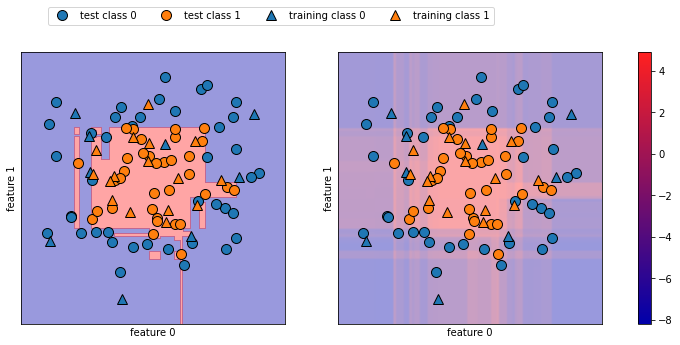

In [249]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    #훈련 포인트, 테스트 포인트를 그림.
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['test class 0', 'test class 1', 'training class 0', 'training class 1'],
               ncol=4, loc=(.1, 1.1))
plt.show()

예측한 결과뿐만 아니라 분류기가 얼마나 확신하는지를 알면 추가 정보를 얻을 수 있음. 다만 두 클래스 사이의 경계를 구분하기는 어려움.

## 2.4.2 예측 확률

`predict_proba` 메서드의 출력값은 각 클래스에 대한 확률이고 `decision_function`의 출력에 비해 이해하기 더 수월함. 이 값의 크기는 이진 분류에서는 항상 `(n_samples, 2)` 형태를 취함.

In [250]:
print('확률 값의 형태:', gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


첫 번째 원소는 첫 번째 클래스의 예측 확률, 두 번째 원소는 두 번째 클래스의 예측 확률임. 확률이므로 항상 0~1 사잇값을 가지며 두 클래스에 대한 모든 확률의 합은 1임.

`predict_proba` 메서드의 값 중에 6개만 출력함.

In [251]:
print('예측 확률:\n', gbrt.predict_proba(X_test[:6]))

예측 확률:
 [[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


두 클래스의 확률 합은 1이므로 두 클래스 중에 하나는 50% 이상의 확신을 가짐. 높은 확률 값을 가진 클래스가 예측값임.

앞의 출력 값을 보면 샘플 대부분에서 분류기가 강한 확신을 보여주는 것을 알 수 있음. 데이터에 있는 불확실성이 값에 반영되는 정도는 모델과 매개변수 설정에 좌우됨. 과대적합 된 모델은 잘못된 예측이라도 예측 확실성이 강하고, 복잡도가 낮은 모델은 예측 불확실성이 더 높음. 이런 불확실성과 모델의 정확도가 동등하면 이 모델은 '보정(calibration)'되었다고 함. 보정된 모델에서 70% 확신을 가진 예측은 70% 정확도를 낼 것임. 이해하기 어려우면 '혼자 공부하는 머신러닝 + 딥러닝' 서적에 대한 정리본의 결정함수 파트를 참고하길 바람.

같은 데이터셋을 사용해서 그레이디언트 부스팅 모델의 결정 경계와 클래스 1의 확률을 그림.

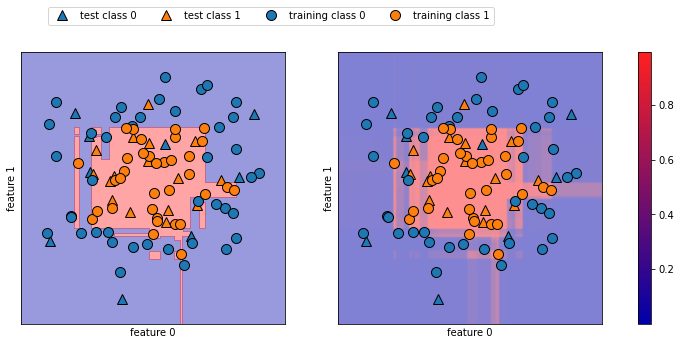

In [252]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그림.
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
# colorbar를 그림.
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['test class 0', 'test class 1', 'training class 0', 'training class 1'], ncol=4, loc=(.1, 1.1))
plt.show()

왼쪽 그림을 보면 결정 경계가 명확하게 나뉘어 있으며, 왼쪽 그림을 보면 불확실성이 있는 작은 영역도 확인할 수 있음.

[불확실성 추정을 비교한 사이킷런 사이트 좌표](https://bit.ly/2cqCYx6)를 참고하여 인위적으로 만든 데이터셋을 사용한 여러 분류기를 확인하길 바람. 아래 코드는 해당 좌표에서 가져온 비교 그림임.

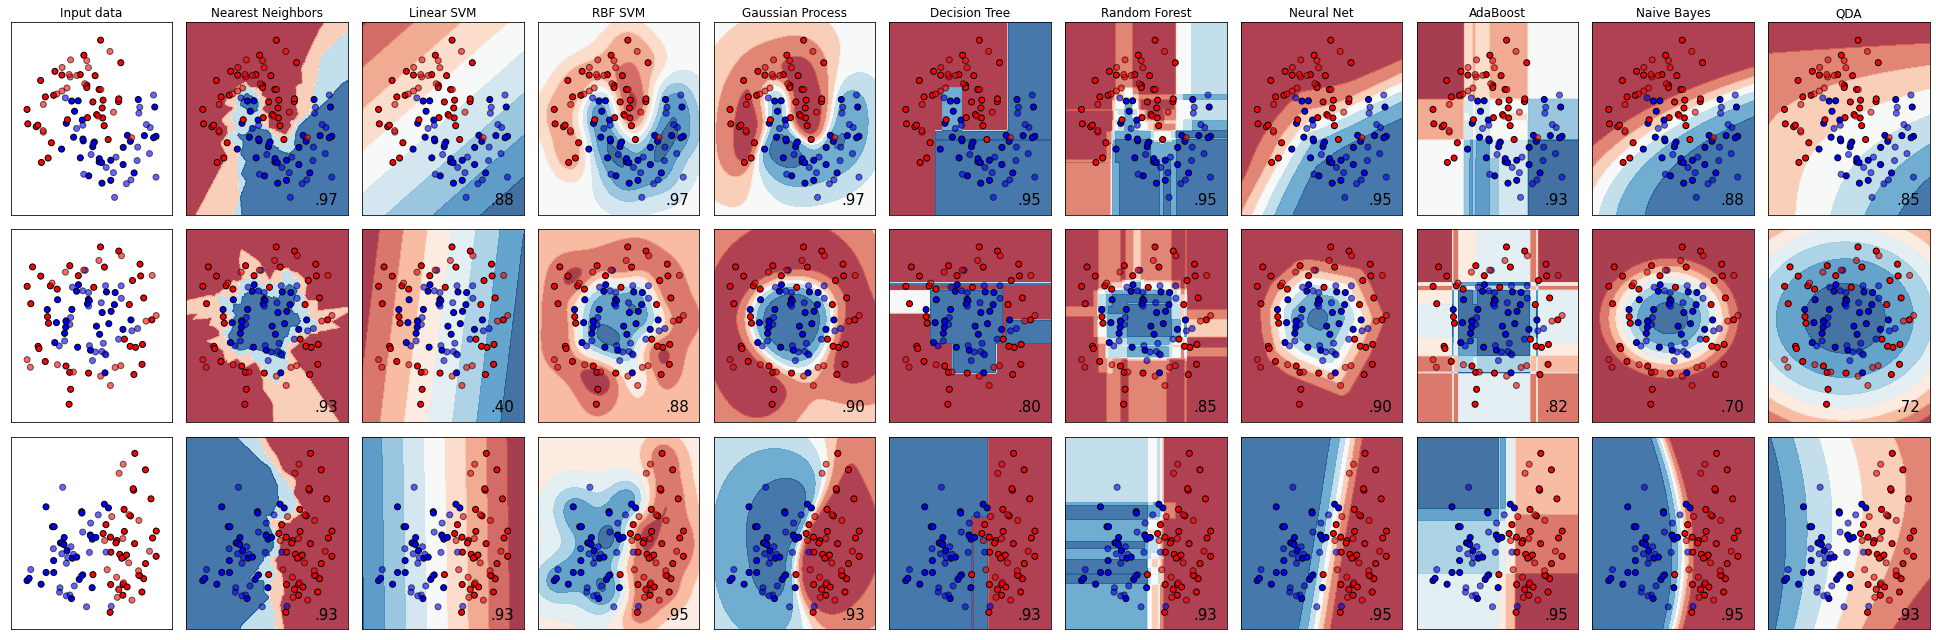

In [253]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

##2.4.3 다중 분류에서의 불확실성

위에서 사용한 `decision_function` 메서드와 `predict_proba` 메서드는 다중 분류에도 사용할 수 있음.

클래스가 세 개인 iris 데이터셋에 적용함. 

In [254]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print('결정 함수의 결과 형태:', gbrt.decision_function(X_test).shape)
# 앞부분 6개만 확인함.
print('결정 함수 결과:\n', gbrt.decision_function(X_test)[:6])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


다중 분류의 경우 `decision_function` 메서드의 결괏값 크기는 `(n_samples, n_classes)` 형태를 취함. 각 열은 각 클래스에 대한 확신 점수를 가지는데, 수치가 크면 해당 클래스일 확률이 높고, 수치가 작으면 해당 클래스일 확률이 낮음. 샘플마다 가장 큰 점수를 찾아서 예측 결과를 동일하게 출력할 수 있음.

In [255]:
print('가장 큰 결정 함수의 인덱스:\n', np.argmax(gbrt.decision_function(X_test), axis=1))
print('예측:\n', gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


`predict_proba` 메서드의 출력값 크기를 출력함. 위에서 확인했던 바처럼 `(n_samples, n_classes)` 형태를 취하며, 각 샘플에서 클래스 확률을 모두 더하면 1임.

In [256]:
# 앞부분 6개만 확인함.
print('예측 확률:\n', gbrt.predict_proba(X_test)[:6])
# 행 방향(`axis=1`)으로 합하면 1임.
print('총합:', gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
총합: [1. 1. 1. 1. 1. 1.]


`predict_proba` 결과에 `argmax` 함수를 적용해서 예측을 같게 출력함.

In [257]:
print('가장 큰 예측 확률의 인덱스:\n', np.argmax(gbrt.predict_proba(X_test), axis=1))
print('예측:\n', gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


`predict_proba`와 `decision_function`의 결괏값 크기는 항상 `(n_samples, n_classes)`이지만, 이진 분류의 `decision_function`은 약간 다름. 이진 분류에서 `decision_function`은 열이 하나뿐이고 양성 클래스인 `classes_[1]`에 대응하는 값을 가짐. 오래전부터 내려온 관례 때문이라고 함.

열이 `n_classes`개일 경우에는 열을 가로질러 `argmax` 함수를 적용해서 예측 결과를 재현할 수 있음. 다만 주의할 점은 클래스가 문자열이거나, 정수형을 사용하지만 연속적이지 않고 0부터 시작하지 않을 수 있음. 클래스가 숫자일 경우엔 `predict_proba`와 `decision_function`의 배열 인덱스와 동일할 수 있으며 `argmax` 값이 그대로 예측 클래스가 됨. 하지만 클래스 숫자가 "1"처럼 문자열이거나 연속된 숫자가 아닐 수 있으므로 항상 `classes_` 값을 사용해야 버그 발생을 방지할 수 있음.

여하튼 `predict`로 출력한 결과와 `decision_function`,`predict_proba`의 결과를 비교하려면 분류기의 `classes_` 속성을 사용해서 클래스의 실제 이름을 얻어야 함.

In [262]:
logreg = LogisticRegression()

# iris 데이터셋의 타깃을 클래스 이름으로 나타냄.
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print('훈련 데이터에 있는 클래스 종류:', logreg.classes_)
print('예측:', logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print('가장 큰 결정 함수의 인덱스:', argmax_dec_func[:10])
print('인덱스를 classes_에 연결:', logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 2.5 요약 및 정리

- 최근접 이웃: 작은 데이터셋일 경우에 기본 모델로서 좋고 설명하기 수월함.

- 선형 모델: 맨처음 시도해볼 만한 알고리즘으로 큰 데이터셋이나 고차원 데이터에 가능함.

- 나이브 베이즈: 분류만 가능하며, 선형 모델보다 속도가 훨씬 빠르지만 덜 정확함. 대용량 데이터셋, 고차원 데이터에 가능함.

- 결정 트리: 매우 빠르고, 데이터 스케일 조정이 필요하지 않음. 시각화하기 좋으므로 설명하기에 매우 수월함.

- 랜덤 포레스트: 결정 트리 하나보다 좋은 성능을 내며 매우 안정적이고 강력함. 데이터 스케일 조정 작업이 필요하지 않지만 고차원 희소 데이터에는 적합하지 않음.

- 그레이디언트 부스팅 결정 트리: 랜덤 포레스트에 비하면 성능이 약간 좋은 수준이면서 학습은 느리지만 예측은 빠르고 메모리를 조금 사용함.

- 서포트 벡터 머신: 비슷한 의미의 특성으로 이러진 중간 규모 데이터셋에 적합함. 데이터 스케일을 조정해야 하며 매개변수에 민감하므로 적절한 값을 지정해야 함.

- 신경망: 추후 추가 예정임.

새로운 데이터셋으로 작업할 때는 간단한 모델로 시작해서 성능이 얼마나 나오는지 가늠해보는 것이 좋음(선형 모델, 나이브 베이즈 또는 최근접 이웃 분류기). 데이터에 대해 파악한 후에는 복잡한 모델을 만들 수 있는 알고리즘을 고려할 만함(랜덤 포레스트, 그레이디언트 부스팅 결정 트리, SVM, 신경망).